# Pendahuluan

- Analisis ini berpusat pada segmentasi pelanggan menggunakan metode RFM (Recency, Frequency, Monetary)
- Tujuannya adalah untuk memahami perilaku pelanggan secara lebih mendalam agar dapat merancang strategi pemasaran yang lebih efektif dan personal.

# Business Understanding

### Latar Belakang

Olist adalah salah satu platform e-commerce terbesar di Brasil, dan dataset publiknya menyediakan data transaksi nyata yang kaya dan komprehensif dari tahun 2016 hingga 2018. Latar belakang pemilihan dataset ini adalah:

1. Data Transaksi Asli: Dataset ini mencerminkan perilaku pembelian nyata, termasuk siapa yang membeli, kapan mereka membeli, dan berapa banyak yang mereka belanjakan.

2. Kekayaan Informasi: Mencakup detail pesanan, informasi pelanggan, dan item produk, yang semuanya penting untuk analisis perilaku pelanggan.

3. Ukuran yang Signifikan: Dengan lebih dari 100.000 pesanan, dataset ini cukup besar untuk menghasilkan wawasan statistik yang valid dan dapat diandalkan.

### Tujuan Analisis Bisnis

Tujuan utama dari analisis ini adalah untuk meningkatkan retensi dan nilai pelanggan dengan melakukan segmentasi. Secara spesifik, tujuannya adalah:

1. Mengidentifikasi Kelompok Pelanggan: Mengelompokkan pelanggan ke dalam segmen-segmen yang berbeda berdasarkan perilaku pembelian mereka (kapan terakhir membeli, seberapa sering, dan total nilai belanja).

2. Memahami Karakteristik Segmen: Menganalisis dan memahami karakteristik unik dari setiap segmen pelanggan. Misalnya, siapa pelanggan terbaik (Champions), siapa yang berisiko pergi (At-Risk), dan siapa yang sudah lama tidak aktif (Lost).

3. Dasar Pengambilan Keputusan: Menyediakan dasar yang kuat bagi tim pemasaran dan penjualan untuk merancang strategi yang tepat sasaran. Contohnya, program loyalitas untuk pelanggan terbaik atau kampanye re-aktivasi untuk pelanggan yang hampir "hilang".


# Data Understanding

### Tujuan

Tujuan dari tahap pemahaman data ini adalah untuk mengidentifikasi dan memahami setiap sumber data yang tersedia. Dalam konteks analisis Anda (Segmentasi Pelanggan RFM dengan potensi analisis geografis), setiap file memiliki peran spesifik namun saling berhubungan untuk membentuk satu set data analisis yang utuh.

1. Olist Orders.csv - Kerangka Waktu dan Transaksi

- Peran Utama: File ini adalah tulang punggung dari analisis perilaku. Ia mencatat kapan sebuah transaksi terjadi dan siapa yang melakukannya dari sisi pesanan.

- Isi Kunci yang Digunakan:
1. order_id: Kunci unik untuk setiap pesanan, digunakan untuk menghubungkan ke detail item.
customer_id: Kunci untuk menghubungkan pesanan ke pelanggan.

2. order_purchase_timestamp: Kolom paling krusial untuk analisis ini. Digunakan untuk menghitung Recency (R), yaitu kapan terakhir seorang pelanggan melakukan pembelian.

3. order_status: Digunakan untuk memfilter data, memastikan hanya pesanan yang sudah selesai (delivered) yang dianalisis untuk menjaga akurasi.

4. Kontribusi pada Analisis: Menyediakan data dasar untuk metrik Recency dan menjadi jembatan awal untuk menghitung Frequency.

2. Olist Order Items.csv - Nilai Moneter Pesanan

- Peran Utama: File ini merinci isi dari setiap pesanan dan yang terpenting, berapa nilai dari transaksi tersebut.

- Isi Kunci yang Digunakan:

1. order_id: Digunakan untuk menggabungkan data ini dengan file Olist Orders.csv.

2. price: Harga dari setiap item yang dibeli.

3. freight_value: Biaya pengiriman untuk setiap item.

- Kontribusi pada Analisis: Menyediakan data untuk metrik Monetary (M). Total nilai belanja seorang pelanggan dihitung dengan menjumlahkan price (dan bisa juga freight_value) dari semua item yang pernah ia beli.

3. Olist Customers.csv - Identitas Unik Pelanggan

- Peran Utama: File ini adalah kunci untuk memahami pelanggan sebagai individu yang unik, bukan sekadar serangkaian transaksi. Ini adalah file identitas.

- Isi Kunci yang Digunakan:

1. customer_id: Kunci yang berubah untuk setiap pesanan baru dari seorang pelanggan.

2. customer_unique_id: Kolom paling penting di file ini. Ini adalah identitas asli pelanggan yang tetap sama di semua pesanannya. Analisis RFM yang akurat harus dikelompokkan berdasarkan customer_unique_id.

3. customer_zip_code_prefix: Kunci untuk menghubungkan pelanggan ke lokasi geografisnya.

- Kontribusi pada Analisis:

1. Memastikan perhitungan Frequency (F) (jumlah pesanan) dan Monetary (M) (total belanja) dilakukan untuk pelanggan yang benar-benar unik.

2. Menjadi penghubung ke data geografis melalui customer_zip_code_prefix.

4. Olist Geolocation.csv - Konteks Geografis

- Peran Utama: Berfungsi sebagai kamus data atau tabel referensi untuk menerjemahkan kode pos menjadi koordinat spasial (lintang dan bujur).

- Isi Kunci yang Digunakan:

1. geolocation_zip_code_prefix: Kunci untuk digabungkan dengan file Olist Customers.csv.

2. geolocation_lat: Koordinat Lintang.

3. geolocation_lng: Koordinat Bujur.

- Kontribusi pada Analisis: File ini tidak digunakan untuk perhitungan RFM itu sendiri. Perannya adalah untuk pengayaan (enrichment) setelah segmen pelanggan terbentuk. Data ini dimungkinkan untuk memvisualisasikan persebaran segmen pelanggan pada peta, sehingga dapat menjawab pertanyaan "Di mana lokasi segmen pelanggan X?".

### Keterhubungana dalam Analisis

- Proses pengolahan data Anda pada dasarnya mengikuti alur berikut untuk menciptakan dataset analisis akhir:

1. Gabungkan Nilai & Waktu: Olist Order Items.csv digabungkan dengan Olist Orders.csv menggunakan order_id. Hasilnya adalah sebuah tabel yang berisi setiap item, harganya, dan kapan item itu dipesan.

2. Hubungkan ke Pelanggan: Tabel gabungan dari langkah 1 kemudian digabungkan dengan Olist Customers.csv menggunakan customer_id. Sekarang Anda memiliki data yang menghubungkan setiap item yang dibeli ke customer_unique_id.

3. Hitung Metrik RFM: Data diagregasi (dikelompokkan) berdasarkan customer_unique_id untuk menghitung:
- Recency: Tanggal pembelian terakhir.
- Frequency: Jumlah order_id yang unik.
- Monetary: Jumlah dari price.

4. Lakukan Segmentasi: Model clustering (seperti SOM) atau metode kuartil diterapkan pada nilai RFM untuk menciptakan segmen-segmen pelanggan.

5. Tambahkan Konteks Lokasi: Data pelanggan dari Olist Customers.csv digabungkan dengan Olist Geolocation.csv menggunakan geolocation_zip_code_prefix untuk mendapatkan koordinat setiap pelanggan. Data lokasi ini kemudian dapat digabungkan dengan hasil segmentasi Anda untuk analisis spasial.

# Alasan penggunaan RFM

Penggunaan RFM saja seringkali menjadi pilihan utama karena tiga alasan strategis berikut:

1. Sangat Efektif dan Relevan: RFM mengukur tiga dimensi perilaku pelanggan yang paling fundamental dan prediktif:

- Recency: Kapan terakhir membeli, indikator utama retensi.
- Frequency: Seberapa sering membeli, indikator utama loyalitas.
- Monetary: Berapa banyak uang yang dibelanjakan, indikator utama nilai pelanggan. Ketiga faktor ini secara langsung berkorelasi dengan keuntungan dan Customer Lifetime Value.

2. Implementasi Cepat dan Sederhana: Dibandingkan model machine learning yang kompleks, RFM hanya memerlukan data transaksi dasar (ID pelanggan, tanggal, nilai belanja) yang hampir selalu tersedia. Perhitungannya lugas dan tidak membutuhkan sumber daya komputasi yang besar.

3. Hasil yang Langsung Dapat Ditindaklanjuti (Actionable): Output dari RFM adalah segmen pelanggan yang sangat intuitif (misalnya "Pelanggan Terbaik", "Pelanggan Berisiko Pindah", "Pelanggan Hilang"). Setiap segmen ini secara jelas menyarankan strategi pemasaran yang spesifik, memungkinkan perusahaan untuk mengalokasikan sumber daya secara efisien dengan ROI yang tinggi.

In [ ]:
%pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.1 MB/s eta 0:00:00


# Import Library

In [ ]:
# === Manipulasi Data ===
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import unidecode

# === Visualisasi ===
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# === Time Series ===
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from datetime import timedelta

# === Preprocessing / Sklearn Tools ===
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics import silhouette_score

# === Utilitas ===
import urllib.request
import warnings
warnings.filterwarnings('ignore')

# === Konstanta ===
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


# Customers

In [ ]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

#print("Path to dataset files:", path)

In [ ]:
#customers = pd.read_csv("/Users/macbookair/Downloads/Folder Penting Everything/File Coding Py/archive/Olist Customers.csv")
#geo_locations = pd.read_csv("/Users/macbookair/Downloads/Folder Penting Everything/File Coding Py/archive/Olist Geolocation.csv")
#orders = pd.read_csv("/Users/macbookair/Downloads/Folder Penting Everything/File Coding Py/archive/Olist Orders.csv")
#orders_items = pd.read_csv("/Users/macbookair/Downloads/Folder Penting Everything/File Coding Py/archive/Olist Order Items.csv")

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 4/ML/Tubes/olist_customers_dataset.csv')
geo_locations = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 4/ML/Tubes/olist_geolocation_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 4/ML/Tubes/olist_orders_dataset.csv')
orders_items = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 4/ML/Tubes/olist_order_items_dataset.csv')

In [ ]:
dfs = [customers,geo_locations,orders,orders_items]
dfs_name = ["customers","geo_locations","orders","orders_items"]

In [ ]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
79564,1ae437d610d788b4a1e89575f05ce0db,047da58c84a4e46b1e22557054715b6c,20735,rio de janeiro,RJ
58172,eba2b167e764f26251de139177a73708,b48a83f209e95c1d6b16462856b97315,17209,jau,SP
26303,dd2c12cc177b631cc2bcf253227b8a8c,4a6fe6cfa654759ea43a9522b81a2737,76290,itapirapua,GO
75796,b814450275c3815ada3733398aee1a80,beb7ddfca20bc721584e70834d3cd2f8,37500,itajuba,MG
37164,c19cb9a7806575c180eae3eb267a722f,f379ea89b6e06d9acdb03974d4ea3b0c,56460,petrolandia,PE


In [ ]:
customers.isna().mean()

,0
customer_id,0.0
customer_unique_id,0.0
customer_zip_code_prefix,0.0
customer_city,0.0
customer_state,0.0


In [ ]:
customers.groupby('customer_unique_id').size().sort_values(ascending=False)

,0
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
ca77025e7201e3b30c44b472ff346268,7
...,...
5656a8fabc8629ff96b2bc14f8c09a27,1
56560124a5cc70119deb685775639ea7,1
5655ee330a79bd1fd1e5fb220c2436dd,1


# Geo Location

In [ ]:
geo_locations.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
719158,55292,-8.899271,-36.500828,garanhuns,PE
404137,19970,-22.785401,-50.222048,palmital,SP
216761,8840,-23.472253,-46.129046,mogi das cruzes,SP
869303,84320,-24.655722,-50.848567,reserva,PR
789316,72225,-15.818902,-48.112121,brasilia,DF


In [ ]:
geo_locations.isna().mean()

,0
geolocation_zip_code_prefix,0.0
geolocation_lat,0.0
geolocation_lng,0.0
geolocation_city,0.0
geolocation_state,0.0


In [ ]:
geo_locations['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [ ]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [ ]:
geo_locations['geolocation_city'] = geo_locations['geolocation_city'].apply(pretty_string)

In [ ]:
geo_locations.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
1200,1
1189,1
1290,1


In [ ]:
geo_locations[geo_locations['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


In [ ]:
other_state_geolocation = geo_locations.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geo_locations.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = geo_locations.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
def plot_brasil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

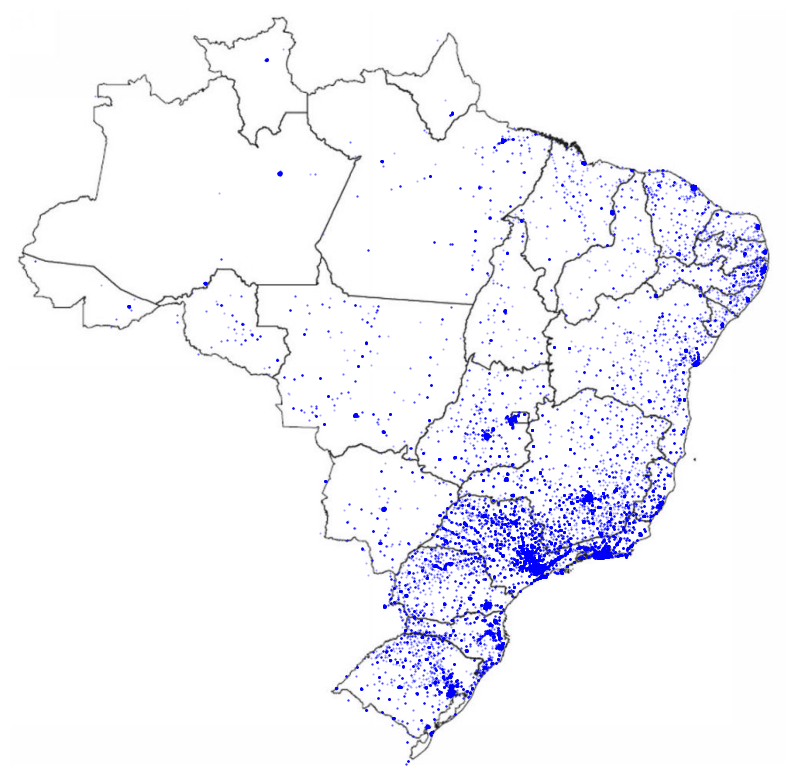

In [ ]:
plot_brasil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

# Orders items

In [ ]:
orders_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
104469,ed5603443e33d323cc6bbde5d9e74d25,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-20 21:14:29,56.99,14.15
66810,98b736865640a09748dfa712c907b68d,1,a203dd46978039dcbd6329a71112f09a,4e7c18b98d84e05cbae3ff0ff03846c2,2017-04-14 13:22:27,139.00,52.52
61770,8cf2872446567a22b4bf3c3b713f6f8b,1,283dc451ad3918badb976d56ff887289,da8622b14eb17ae2831f4ac5b9dab84a,2017-11-07 19:26:35,89.90,17.88
107531,f45d4aa8bc99c39436fe3636932ea53f,1,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2018-08-21 08:31:26,49.90,41.33
105374,ef59d0e720795bd288acef80bd96d2cc,1,92fc46ca7d96704d71f84ed65943a0c1,46dc3b2cc0980fb8ec44634e21d2718e,2017-02-03 21:56:11,179.99,18.00


In [ ]:
orders_items.isna().mean()

,0
order_id,0.0
order_item_id,0.0
product_id,0.0
seller_id,0.0
shipping_limit_date,0.0
price,0.0
freight_value,0.0


In [ ]:
orders_items.groupby('order_id').size().sort_values(ascending=False)

,0
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1
5a071192a28951b76774e5a760c8c9b7,1


In [ ]:
order_items_silver = orders_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

<ipython-input-25-384016185>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order_items_silver = orders_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()
<ipython-input-25-384016185>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order_items_silver = orders_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()
<ipython-input-25-384016185>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used direc

<Axes: xlabel='price', ylabel='freight_value'>

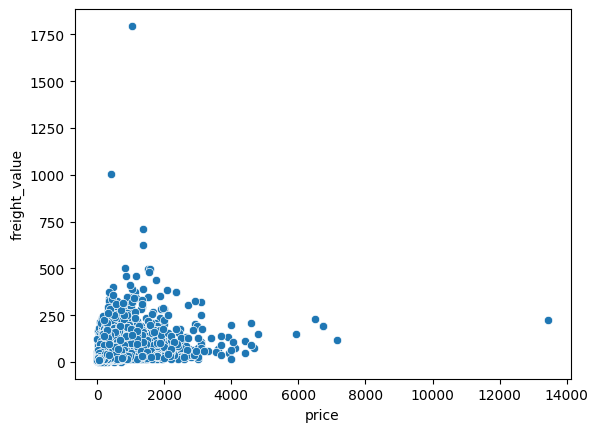

In [ ]:
sns.scatterplot(x='price',y='freight_value',data=order_items_silver)

In [ ]:
order_items_silver.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [ ]:
percentil_freight_value = order_items_silver['freight_value'].quantile(0.99)
order_items_silver = order_items_silver[(order_items_silver['price'] <= 5000) & (order_items_silver['freight_value'] <= percentil_freight_value)]

In [ ]:
order_items_silver.describe()

,price,freight_value
count,97679.000000,97679.000000
mean,132.046700,21.423227
std,185.015685,14.133667
min,0.850000,0.000000
25%,45.900000,13.790000
50%,85.000000,17.070000
75%,149.900000,23.700000
max,4690.000000,104.980000


In [ ]:
order_items_silver

,order_id,price,freight_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,2017-02-13 13:57:51
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,2017-08-21 00:04:32


# Orders

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
columns_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_timestamp:
    orders[column] = pd.to_datetime(orders[column])

In [ ]:
orders['diff_delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days

In [ ]:
orders.groupby(orders['diff_delivery_days'] < 0).size()

,0
diff_delivery_days,
False,91614
True,7827


count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64


<Axes: xlabel='diff_delivery_days', ylabel='Count'>

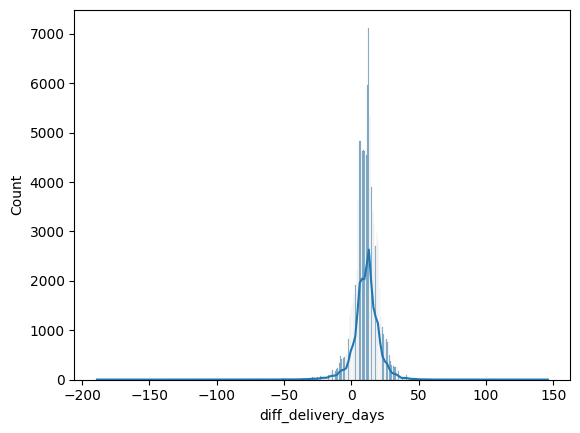

In [ ]:
print(orders['diff_delivery_days'].describe())
sns.histplot(x='diff_delivery_days', data=orders, kde=True)

In [ ]:
orders[(orders['diff_delivery_days'] > min(orders['diff_delivery_days'])) & (orders['diff_delivery_days'] < max(orders['diff_delivery_days'])) ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20.0


In [ ]:
orders_silver = orders.merge(order_items_silver,on='order_id',how='inner')

In [ ]:
def plot_ts_decompose(decompose,figsize=(12,8)):
    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(x=decompose.observed.index, y=decompose.observed.values, ax=ax[0])
    sns.lineplot(x=decompose.trend.index, y=decompose.trend.values, ax=ax[1])
    sns.lineplot(x=decompose.seasonal.index, y=decompose.seasonal.values, ax=ax[2])
    sns.lineplot(x=decompose.resid.index, y=decompose.resid.values, ax=ax[3])
    plt.tight_layout()

In [ ]:
orders_silver['month_year_purchase'] = orders_silver['order_purchase_timestamp'].dt.to_period('M')
order_purchase_timestamp = orders_silver.groupby('month_year_purchase').size()
order_purchase_timestamp.index = order_purchase_timestamp.index.astype('datetime64[ns]')

decompose = seasonal_decompose(order_purchase_timestamp,model='additive',period=12, extrapolate_trend=12)
plot_ts_decompose(decompose)

Error in callback <function flush_figures at 0x7e9a931d98a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
orders_customers = customers.merge(orders_silver, on='customer_id', how='inner')

In [ ]:
max_date = max(orders_customers['order_purchase_timestamp']) + datetime.timedelta(days=1)

In [ ]:
rfm_data = orders_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'
}).reset_index()
rfm_data.columns =['customer_id','recency','frequency','monetary']

0.03034247735162137
count    94488.000000
mean         1.033771
std          0.210110
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: frequency, dtype: float64


<Axes: xlabel='frequency', ylabel='Count'>

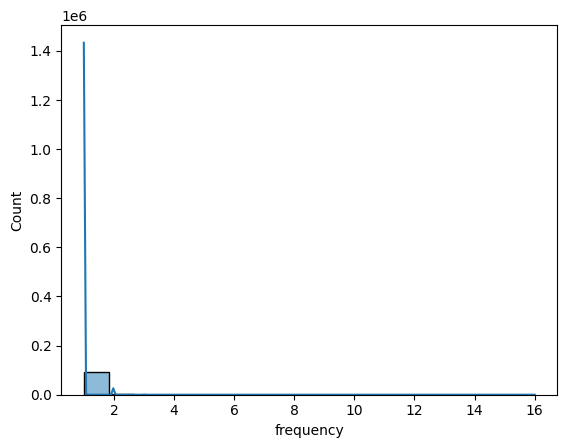

In [ ]:
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

count    94488.000000
mean       136.506113
std        190.946953
min          0.850000
25%         47.000000
50%         89.000000
75%        150.000000
max       4690.000000
Name: monetary, dtype: float64


<Axes: xlabel='monetary', ylabel='Count'>

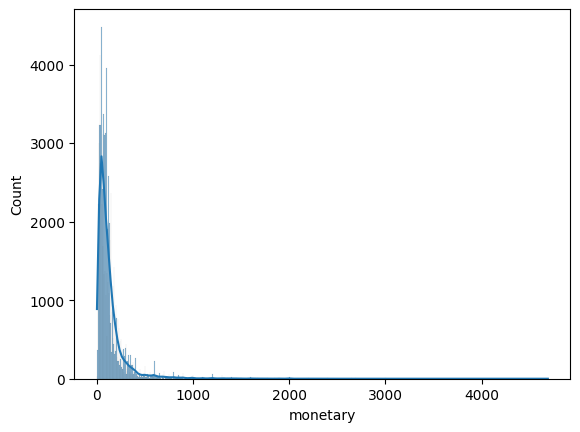

In [ ]:
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

count    94488.000000
mean       243.851198
std        153.165787
min          1.000000
25%        120.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: recency, dtype: float64


<Axes: xlabel='recency', ylabel='Count'>

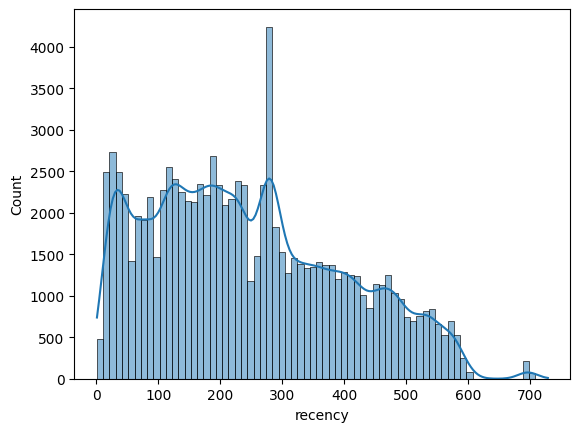

In [ ]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)

# Data Preparation

In [ ]:
for i in dfs:
    print(i.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
diff_delivery_days               2965
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [ ]:
orders.head(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,5.0
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,NaN
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,11.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,31.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,6.0


In [ ]:
orders['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
orders['order_status'].unique()


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
orders['order_status'].nunique()


8

In [ ]:
orders['order_status'].value_counts()


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
orders.groupby('order_status').agg({
    'order_approved_at': lambda x: x.isnull().sum(),
    'order_delivered_carrier_date': lambda x: x.isnull().sum(),
    'order_delivered_customer_date': lambda x: x.isnull().sum(),
})


,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
order_status,,,
approved,0,2,2
canceled,141,550,619
created,5,5,5
delivered,14,2,8
invoiced,0,314,314
processing,0,301,301
shipped,0,0,1107
unavailable,0,609,609


In [ ]:
delivered_orders = orders[orders['order_status'] == 'delivered'].dropna(subset=[
    'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'
])


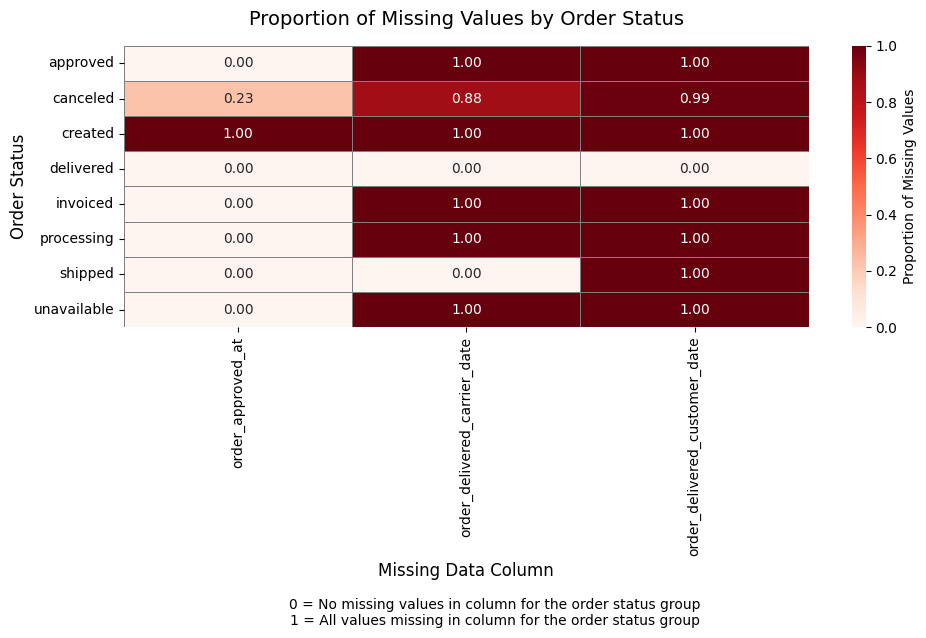

In [ ]:
# Group by order_status and calculate missing values
missing_by_status = orders.groupby('order_status').agg({
    'order_approved_at': lambda x: x.isnull().sum(),
    'order_delivered_carrier_date': lambda x: x.isnull().sum(),
    'order_delivered_customer_date': lambda x: x.isnull().sum(),
})

# Add total orders per order_status
missing_by_status['total_orders'] = orders['order_status'].value_counts()

# Calculate proportion of missing values
missing_proportions = missing_by_status.div(missing_by_status['total_orders'], axis=0)

# Drop 'total_orders' for visualization
heatmap_data = missing_proportions.drop(columns=['total_orders'])

# Plot heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='Reds',
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Proportion of Missing Values'}
)

# Add labels and title
plt.title("Proportion of Missing Values by Order Status", fontsize=14, pad=15)
plt.ylabel("Order Status", fontsize=12)
plt.xlabel("Missing Data Column", fontsize=12)

# Add explanation note
plt.figtext(0.5, -0.05,
            "0 = No missing values in column for the order status group\n"
            "1 = All values missing in column for the order status group",
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()


Berdasarkan korelasi matrix ini menunjukkan bahwa missing valuenya

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,10.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,20.0


In [ ]:
for col in [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
]:
    orders[f'{col}_is_missing'] = orders[col].isna().astype(int)

In [ ]:
ts_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in ts_cols:
    orders[col] = pd.to_datetime(orders[col])

In [ ]:
#    – approved → carrier
orders['days_approve_to_carrier'] = (
    orders['order_delivered_carrier_date'] - orders['order_approved_at']
).dt.days

#    – carrier → customer
orders['days_carrier_to_customer'] = (
    orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
).dt.days

#    – actual delivery vs estimasi
orders['days_actual_vs_estimate'] = (
    orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
).dt.days

In [ ]:
for col in [
    'days_approve_to_carrier',
    'days_carrier_to_customer',
    'days_actual_vs_estimate'
]:
    orders[col].fillna(-1, inplace=True)

<ipython-input-68-2388049615>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders[col].fillna(-1, inplace=True)


In [ ]:
med_approve_to_carrier = orders.groupby('order_status')['days_approve_to_carrier'].median()
orders['days_approve_to_carrier_imp'] = orders.apply(
    lambda r: med_approve_to_carrier[r['order_status']]
    if r['days_approve_to_carrier']==-1 else r['days_approve_to_carrier'],
    axis=1
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_feats = [
    'days_approve_to_carrier_imp',
    'days_carrier_to_customer',
    'days_actual_vs_estimate',
    'diff_delivery_days'
]
cat_feats = ['order_status']

preprocessor = ColumnTransformer([
    (
        'num',
        SimpleImputer(strategy='constant', fill_value=-1),
        num_feats
    ),
    (
        'cat',
        OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
        cat_feats
    ),
])


In [ ]:
print(orders.shape)

(99441, 16)


In [ ]:
print(orders.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'diff_delivery_days', 'order_approved_at_is_missing', 'order_delivered_carrier_date_is_missing', 'order_delivered_customer_date_is_missing', 'days_approve_to_carrier', 'days_carrier_to_customer', 'days_actual_vs_estimate', 'days_approve_to_carrier_imp']


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days,order_approved_at_is_missing,order_delivered_carrier_date_is_missing,order_delivered_customer_date_is_missing,days_approve_to_carrier,days_carrier_to_customer,days_actual_vs_estimate,days_approve_to_carrier_imp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0,0,0,0,2.0,6.0,-8.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0,0,0,0,0.0,12.0,-6.0,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0,0,0,0,0.0,9.0,-18.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0,0,0,0,3.0,9.0,-13.0,3.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0,0,0,0,0.0,1.0,-10.0,0.0


In [ ]:
# Cek distribusi flag missing
for flag in [
    'order_approved_at_is_missing',
    'order_delivered_carrier_date_is_missing',
    'order_delivered_customer_date_is_missing'
]:
    print(flag, orders[flag].value_counts(normalize=True))

# Cek beberapa summary statistik kolom durasi
orders[['days_approve_to_carrier', 'days_carrier_to_customer', 'days_actual_vs_estimate']]\
    .describe()


order_approved_at_is_missing order_approved_at_is_missing
0    0.998391
1    0.001609
Name: proportion, dtype: float64
order_delivered_carrier_date_is_missing order_delivered_carrier_date_is_missing
0    0.98207
1    0.01793
Name: proportion, dtype: float64
order_delivered_customer_date_is_missing order_delivered_customer_date_is_missing
0    0.970183
1    0.029817
Name: proportion, dtype: float64


,days_approve_to_carrier,days_carrier_to_customer,days_actual_vs_estimate
count,99441.000000,99441.000000,99441.000000
mean,2.242083,8.583673,-11.552569
std,3.555277,8.777027,10.200044
min,-172.000000,-17.000000,-147.000000
25%,0.000000,3.000000,-17.000000
50%,1.000000,7.000000,-12.000000
75%,3.000000,11.000000,-7.000000
max,125.000000,205.000000,188.000000


# EDA

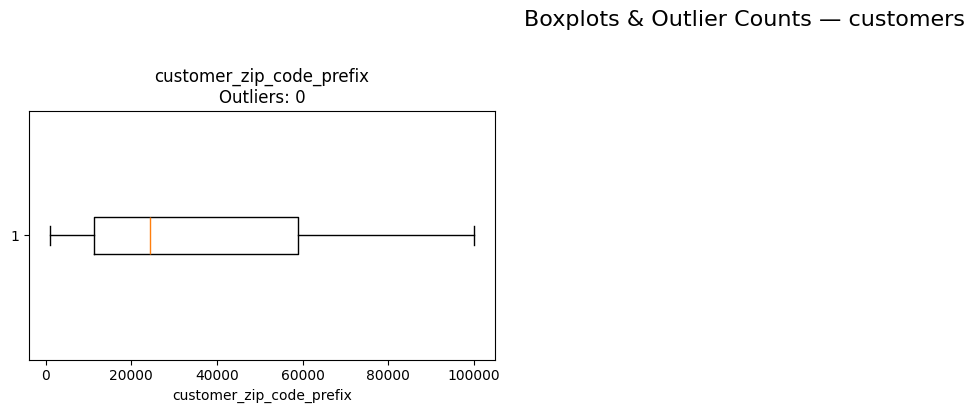

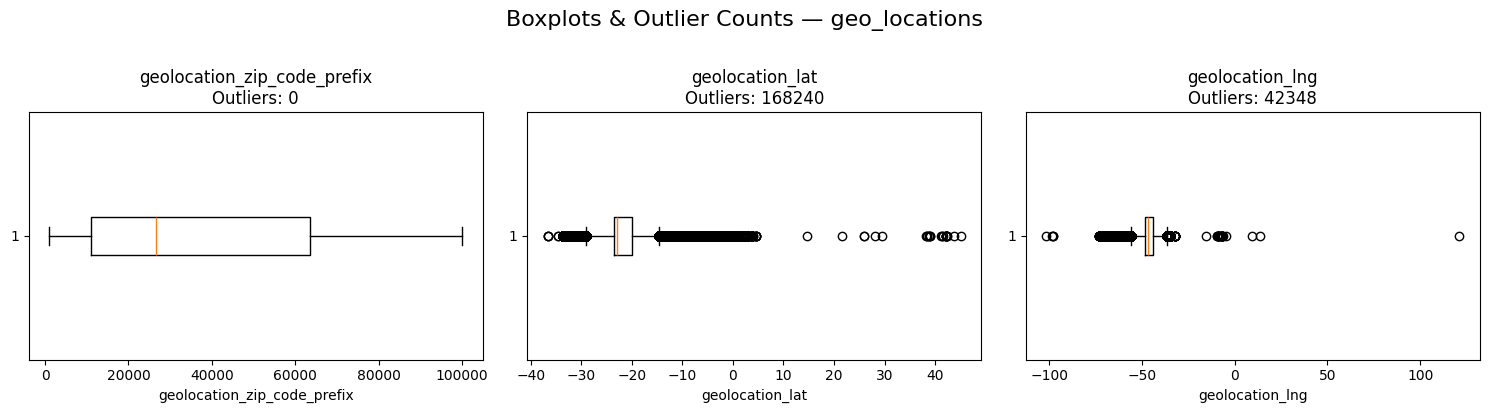

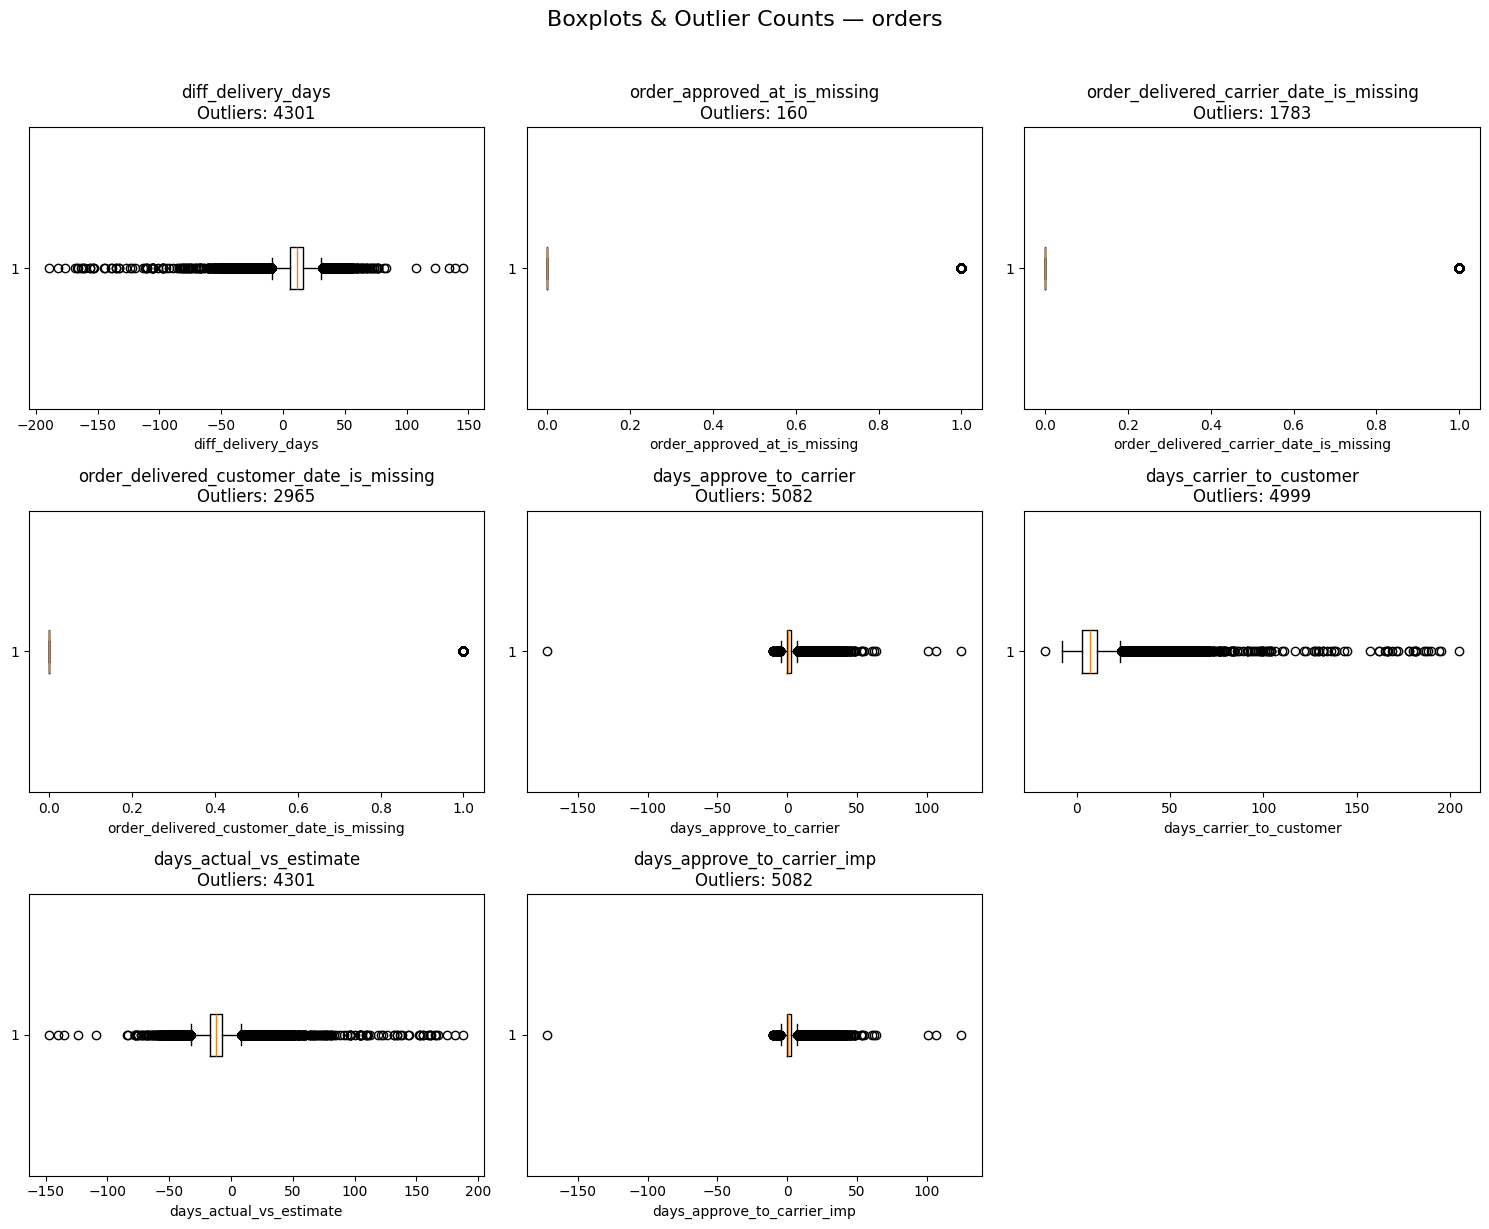

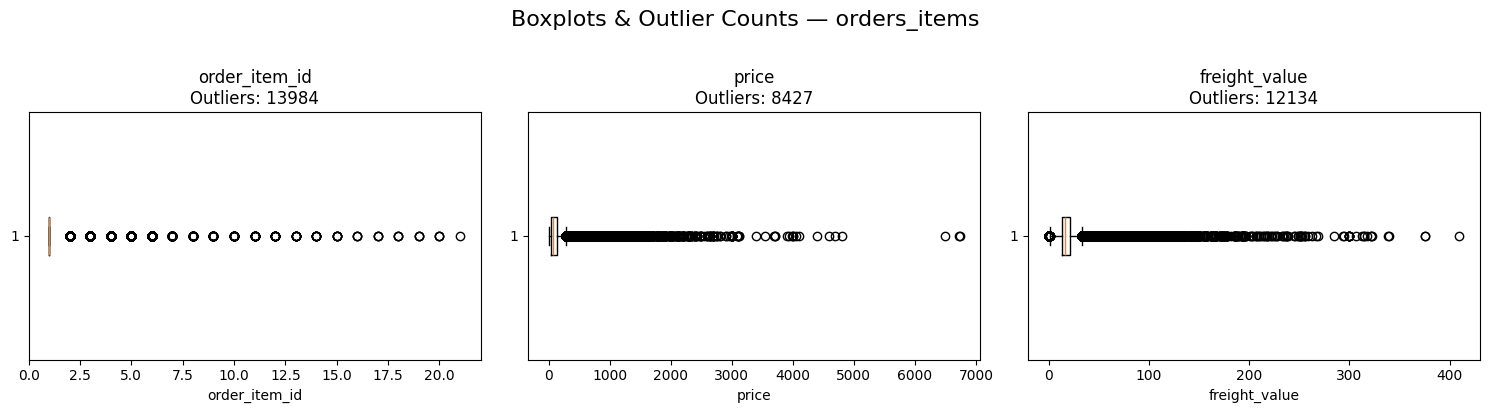

In [ ]:
# Pastikan DataFrame sudah ter-load:
# customers, geo_locations, orders, orders_items

# Fungsi deteksi dan plot boxplot dengan annotasi jumlah outlier
def plot_outliers_boxplots(df: pd.DataFrame, df_name: str, k: float = 1.5):
    num_cols = df.select_dtypes(include='number').columns.tolist()
    n = len(num_cols)
    if n == 0:
        print(f"{df_name} tidak punya kolom numerik.")
        return

    # grid size: up to 3 kolom per baris
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]

        # deteksi outlier
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lo, hi = Q1 - k*IQR, Q3 + k*IQR
        mask = (df[col] < lo) | (df[col] > hi)
        cnt = mask.sum()

        # plot boxplot
        ax.boxplot(df[col].dropna(), vert=False)
        ax.set_title(f"{col}\nOutliers: {cnt}")
        ax.set_xlabel(col)

    # hide any unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Boxplots & Outlier Counts — {df_name}", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


# ── Panggil fungsi untuk tiap DataFrame ──
plot_outliers_boxplots(customers,     "customers")
plot_outliers_boxplots(geo_locations, "geo_locations")
plot_outliers_boxplots(orders,        "orders")
plot_outliers_boxplots(orders_items,  "orders_items")


In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 1️⃣ Import dan Load Data
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# ────────────────────────────────────────────────────────────────────────────────
# 2️⃣ Clean geo_locations (keep Brazil bounds)
geo_locations = geo_locations[
    geo_locations['geolocation_lat'].between(-40, 5) &
    geo_locations['geolocation_lng'].between(-80, -30)
]

# ────────────────────────────────────────────────────────────────────────────────
# 3️⃣ Flags for missing dates in orders
for col in ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']:
    orders[f'{col}_is_missing'] = orders[col].isna().astype(int)

# 4️⃣ Convert timestamps & compute durations
ts_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in ts_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

orders['days_approve_to_carrier'] = (
    orders['order_delivered_carrier_date'] - orders['order_approved_at']
).dt.days
orders['days_carrier_to_customer'] = (
    orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
).dt.days
orders['days_actual_vs_estimate'] = (
    orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
).dt.days

# Fill NaN durations with -1
for col in ['days_approve_to_carrier','days_carrier_to_customer','days_actual_vs_estimate']:
    orders[col] = orders[col].fillna(-1)

# ────────────────────────────────────────────────────────────────────────────────
# 5️⃣ Cap / Winsorize orders delays at 30 days
cap30 = FunctionTransformer(lambda x: np.clip(x, 0, 30))
orders[['days_approve_to_carrier','days_carrier_to_customer',
        'days_actual_vs_estimate','diff_delivery_days']] = \
    cap30.transform(orders[['days_approve_to_carrier','days_carrier_to_customer',
        'days_actual_vs_estimate','diff_delivery_days']])

# ────────────────────────────────────────────────────────────────────────────────
# 6️⃣ Log-transform price & freight_value in orders_items
orders_items['price_log']         = np.log1p(orders_items['price'])
orders_items['freight_value_log'] = np.log1p(orders_items['freight_value'])

# ────────────────────────────────────────────────────────────────────────────────
# 7️⃣ Build preprocessing pipeline (example for modeling later)
num_feats_orders = [
    'days_approve_to_carrier','days_carrier_to_customer',
    'days_actual_vs_estimate','diff_delivery_days'
]
flag_feats       = [
    'order_approved_at_is_missing',
    'order_delivered_carrier_date_is_missing',
    'order_delivered_customer_date_is_missing'
]
cat_feats        = ['order_status']
num_feats_items  = ['price_log','freight_value_log']

preprocessor = ColumnTransformer([
    ('orders_num',   SimpleImputer(strategy='constant', fill_value=-1), num_feats_orders + flag_feats),
    ('orders_cat',   OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_feats),
    ('items_transf', 'passthrough', num_feats_items)
])

pipeline = Pipeline([
    ('preproc', preprocessor),
    # ('model', YourModel())  # tambahkan model pilihanmu di sini
])
# ────────────────────────────────────────────────────────────────────────────────


=== orders delays after capping (should be between 0 and 30) ===
        days_approve_to_carrier  days_carrier_to_customer  \
min                    0.000000                  0.000000   
max                   30.000000                 30.000000   
median                 1.000000                  6.000000   
mean                   2.330129                  8.229933   

        days_actual_vs_estimate  diff_delivery_days  
min                    0.000000            0.000000  
max                   30.000000           30.000000  
median                 0.000000           12.000000  
mean                   0.592233           11.638698  

=== orders_items logs (should be ≥ 0) ===
        price_log  freight_value_log
min      0.615186           0.000000
max      8.815222           6.017814
median   4.330602           2.848392
mean     4.337008           2.891419


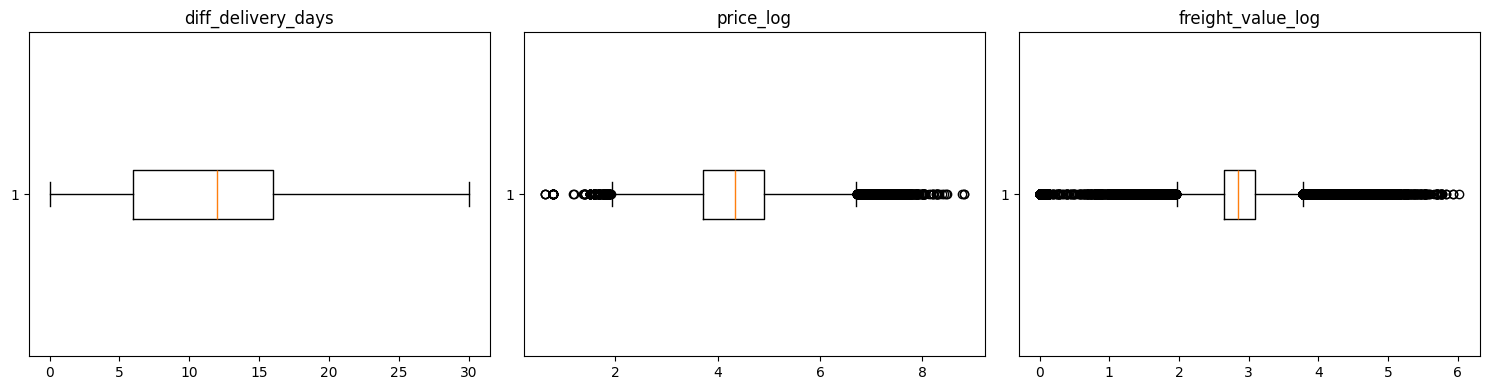


Transformed shape: (112650, 16)

Feature names:
['orders_num__days_approve_to_carrier'
 'orders_num__days_carrier_to_customer'
 'orders_num__days_actual_vs_estimate' 'orders_num__diff_delivery_days'
 'orders_num__order_approved_at_is_missing'
 'orders_num__order_delivered_carrier_date_is_missing'
 'orders_num__order_delivered_customer_date_is_missing'
 'orders_cat__order_status_approved' 'orders_cat__order_status_canceled'
 'orders_cat__order_status_delivered' 'orders_cat__order_status_invoiced'
 'orders_cat__order_status_processing' 'orders_cat__order_status_shipped'
 'orders_cat__order_status_unavailable' 'items_transf__price_log'
 'items_transf__freight_value_log']


In [ ]:
merged = pd.merge(
    orders[
        num_feats_orders +       # numeric delay features
        flag_feats +             # missing-flags
        cat_feats +              # categorical feature(s)
        ['order_id']             # key for join
    ],
    orders_items[
        ['order_id'] + num_feats_items  # item log-features
    ],
    on='order_id',
    how='inner'
)

# Drop order_id (we don't need it as a feature)
X = merged.drop(columns='order_id')

# 2️⃣ Quick stats to confirm capping & log-transform
print("=== orders delays after capping (should be between 0 and 30) ===")
print(X[num_feats_orders].agg(['min','max','median','mean']))

print("\n=== orders_items logs (should be ≥ 0) ===")
print(X[num_feats_items].agg(['min','max','median','mean']))

# 3️⃣ Re-plot a few boxplots to visually inspect
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, ['diff_delivery_days','price_log','freight_value_log']):
    ax.boxplot(X[col].dropna(), vert=False)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# 4️⃣ Finally, run X through the full pipeline
Xt = pipeline.fit_transform(X)
print("\nTransformed shape:", Xt.shape)

# And print out the feature names that the ColumnTransformer produced
print("\nFeature names:")
print(pipeline.named_steps['preproc'].get_feature_names_out())

## 📋 Deskripsi Langkah

1. **Merge DataFrame**  
   - Menggabungkan `orders` dan `orders_items` berdasarkan `order_id` sehingga semua kolom fitur yang dibutuhkan (`days_*`, flags, `order_status`, `price_log`, `freight_value_log`) ada dalam satu DataFrame (`merged`).  
2. **Seleksi dan Persiapan `X`**  
   - Menghapus kolom `order_id` karena hanya dipakai sebagai key join, bukan fitur model.  
3. **Statistical Checks (Before vs. After)**  
   - Mencetak `min`, `max`, `median`, dan `mean` untuk kolom durasi (_delays_) untuk memastikan nilai sudah di-“clip” di rentang 0–30 hari.  
   - Mencetak statistik yang sama untuk kolom log-transformed (`price_log`, `freight_value_log`) untuk memastikan semua nilai ≥ 0.  
4. **Visual Checks**  
   - Membuat **boxplot** ulang untuk 3 kolom utama (`diff_delivery_days`, `price_log`, `freight_value_log`) untuk verifikasi visual bahwa:
     - Durasi ekstrim sudah terbatasi (tidak ada titik di luar 0–30 hari).  
     - Distribusi log-harga dan log-freight sudah non-negatif dan lebih terdistribusi rapi.  
5. **Pipeline Transformation**  
   - Menjalankan `pipeline.fit_transform(X)` pada DataFrame hasil merge:
     - `ColumnTransformer` menyusun ulang, mengimputasi, one-hot encode, dan melewatkan (passthrough) fitur sesuai definisi.  
   - Mencetak hasil `shape` dan daftar nama fitur output untuk memastikan pipeline menghasilkan matriks fitur siap pakai.

---

## 🔄 Kondisi Sebelum & Sesudah

| Tahap         | Sebelum                                                             | Sesudah                                                              |
|---------------|---------------------------------------------------------------------|----------------------------------------------------------------------|
| **Data Merge**  | `orders` & `orders_items` terpisah; pipeline gagal karena `order_status` tidak ada dalam input. | Semua fitur target (`order_status`, delay, flags, log-features) ada dalam satu DataFrame. |
| **Range Durasi** | Nilai delay (`days_*`) bisa negatif atau >30 hari.               | Semua nilai delay di-`clip` ke [0, 30] hari.                         |
| **Skew Harga**   | `price` & `freight_value` sangat skew dengan outlier tinggi.     | Setelah `log1p`, distribusi menjadi lebih simetris dan ≥0.           |
| **Pipeline Input** | Input pipeline tidak lengkap (missing kolom kategori) → error. | Input lengkap, pipeline dapat `fit_transform` tanpa error.           |

---

## 🎯 Main Goal

- **Mempersiapkan data** sehingga **semua fitur** yang relevan:
  - Delay times (capped),  
  - Missing-flags,  
  - Kategori `order_status`,  
  - Log-transformed `price` & `freight_value`  
  tersusun dalam satu DataFrame dan di-transform oleh pipeline.

- **Menjamin kualitas preprocessing**:
  - **Capping** untuk membatasi efek outlier ekstrim,  
  - **Log-transform** untuk mengurangi skew,  
  - **Merge** agar tidak terjadi KeyError,  
  - **Verifikasi statistik dan visual** sebelum dan sesudah transformasi.

- **Hasil akhir**: matriks fitur bersih dan konsisten, siap untuk dipakai pada langkah modeling (misal XGBoost/LightGBM).  


In [ ]:
rfm_data

,customer_id,recency,frequency,monetary,R,F,M,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,1,2,Hibernating
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,0,1,1,Lost
2,0000f46a3911fa3c0805444483337064,542,1,69.00,0,1,1,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,0,1,1,Lost
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,2,Hibernating
...,...,...,...,...,...,...,...,...
94483,fffcc512b7dfecaffd80f13614af1d16,146,1,688.00,3,1,4,Potential Loyslist
94484,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,0,1,1,Lost
94485,ffff371b4d645b6ecea244b27531430a,573,1,89.90,0,1,1,Lost
94486,ffff5962728ec6157033ef9805bacc48,124,1,115.00,1,1,2,Hibernating


In [ ]:
Xt

array([[ 2.        ,  6.        ,  0.        , ...,  0.        ,
         3.43366457,  2.27418562],
       [ 0.        , 12.        ,  0.        , ...,  0.        ,
         4.78498861,  3.16800349],
       [ 0.        ,  9.        ,  0.        , ...,  0.        ,
         5.08078305,  3.00667221],
       ...,
       [ 3.        , 13.        ,  0.        , ...,  0.        ,
         5.19844178,  3.72785975],
       [ 3.        , 13.        ,  0.        , ...,  0.        ,
         5.19844178,  3.72785975],
       [ 0.        ,  6.        ,  0.        , ...,  0.        ,
         4.24132675,  2.96320908]])

# Segmentation

=== SAMPLING RFM DATA ===
Ukuran data asli: 94,488 rows
Ukuran sample: 2,000 rows
Persentase sampling: 2.12%

=== VALIDASI DISTRIBUSI ===

Statistik Populasi:
            recency     frequency      monetary
count  94488.000000  94488.000000  94488.000000
mean     243.851198      1.033771    136.506113
std      153.165787      0.210110    190.946953
min        1.000000      1.000000      0.850000
25%      120.000000      1.000000     47.000000
50%      224.000000      1.000000     89.000000
75%      353.000000      1.000000    150.000000
max      729.000000     16.000000   4690.000000

Statistik Sample:
           recency    frequency     monetary
count  2000.000000  2000.000000  2000.000000
mean    246.771000     1.036500   131.023520
std     154.109508     0.197958   181.915688
min       7.000000     1.000000     4.990000
25%     119.000000     1.000000    48.900000
50%     229.000000     1.000000    87.585000
75%     358.000000     1.000000   153.000000
max     698.000000     3.00000

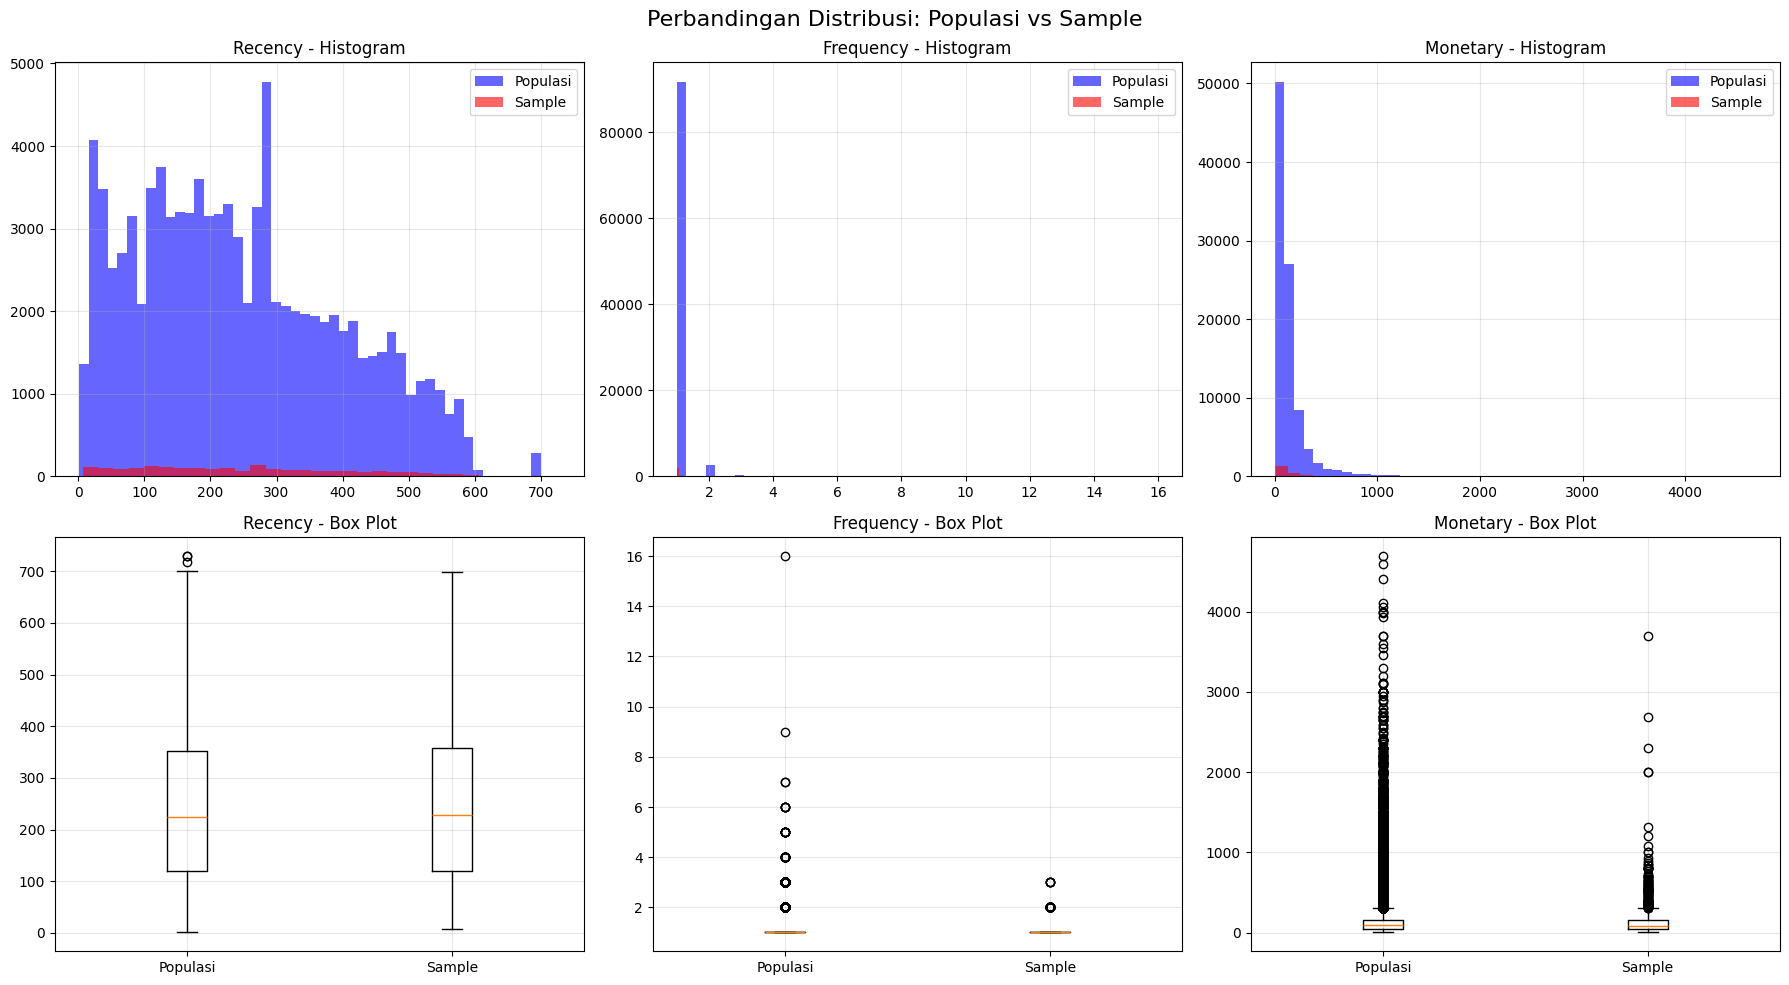

In [ ]:
print("=== SAMPLING RFM DATA ===")
print(f"Ukuran data asli: {len(rfm_data):,} rows")

sample_size = 2000
rfm_sample = rfm_data[['recency', 'frequency', 'monetary']].sample(
    n=sample_size,
    random_state=RANDOM_STATE
).copy()

print(f"Ukuran sample: {len(rfm_sample):,} rows")
print(f"Persentase sampling: {(sample_size/len(rfm_data))*100:.2f}%")


print("\n=== VALIDASI DISTRIBUSI ===")

print("\nStatistik Populasi:")
print(rfm_data[['recency', 'frequency', 'monetary']].describe())

print("\nStatistik Sample:")
print(rfm_sample.describe())


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Perbandingan Distribusi: Populasi vs Sample', fontsize=16)

for i, col in enumerate(['recency', 'frequency', 'monetary']):

    axes[0, i].hist(rfm_data[col], alpha=0.6, label='Populasi', bins=50, color='blue')
    axes[0, i].hist(rfm_sample[col], alpha=0.6, label='Sample', bins=30, color='red')
    axes[0, i].set_title(f'{col.capitalize()} - Histogram')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)


    data_to_plot = [rfm_data[col].values, rfm_sample[col].values]
    axes[1, i].boxplot(data_to_plot, labels=['Populasi', 'Sample'])
    axes[1, i].set_title(f'{col.capitalize()} - Box Plot')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Clustering

In [ ]:
# Define the color palette
pal = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#FFC300",
       "#DAF7A6", "#C70039", "#900C3F", "#581845", "#1ABC9C",
       "#E74C3C", "#3498DB"]

### Class KMeans

Pembuatan class dilakukan untuk kemudahan proses clustering

In [ ]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, random_state=42):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state

    def euclidean_distance(self, point1, point2):
        """Menghitung jarak euclidean antara dua titik"""
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def initialize_centroids(self, X):
        """Inisialisasi centroid secara random"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        centroids = np.zeros((self.k, n_features))

        for i in range(self.k):
            centroids[i] = X[np.random.choice(range(n_samples))]

        return centroids

    def assign_clusters(self, X, centroids):
        """Assign setiap data point ke cluster terdekat"""
        clusters = []

        for point in X:
            distances = []
            for centroid in centroids:
                distance = self.euclidean_distance(point, centroid)
                distances.append(distance)
            cluster = distances.index(min(distances))
            clusters.append(cluster)

        return np.array(clusters)

    def update_centroids(self, X, clusters):
        """Update centroid berdasarkan mean dari data points dalam cluster"""
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

        return centroids

    def calculate_wcss(self, X, clusters, centroids):
        """Menghitung Within-Cluster Sum of Squares"""
        wcss = 0
        for i in range(self.k):
            cluster_points = X[clusters == i]
            for point in cluster_points:
                wcss += self.euclidean_distance(point, centroids[i]) ** 2
        return wcss

    def fit(self, X):
        """Training K-Means"""
        # Inisialisasi centroids
        self.centroids = self.initialize_centroids(X)

        for iteration in range(self.max_iters):
            # Assign clusters
            clusters = self.assign_clusters(X, self.centroids)

            # Update centroids
            new_centroids = self.update_centroids(X, clusters)

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = clusters
        self.wcss = self.calculate_wcss(X, clusters, self.centroids)
        return self

    def predict(self, X):
        """Prediksi cluster untuk data baru"""
        clusters = self.assign_clusters(X, self.centroids)
        return clusters

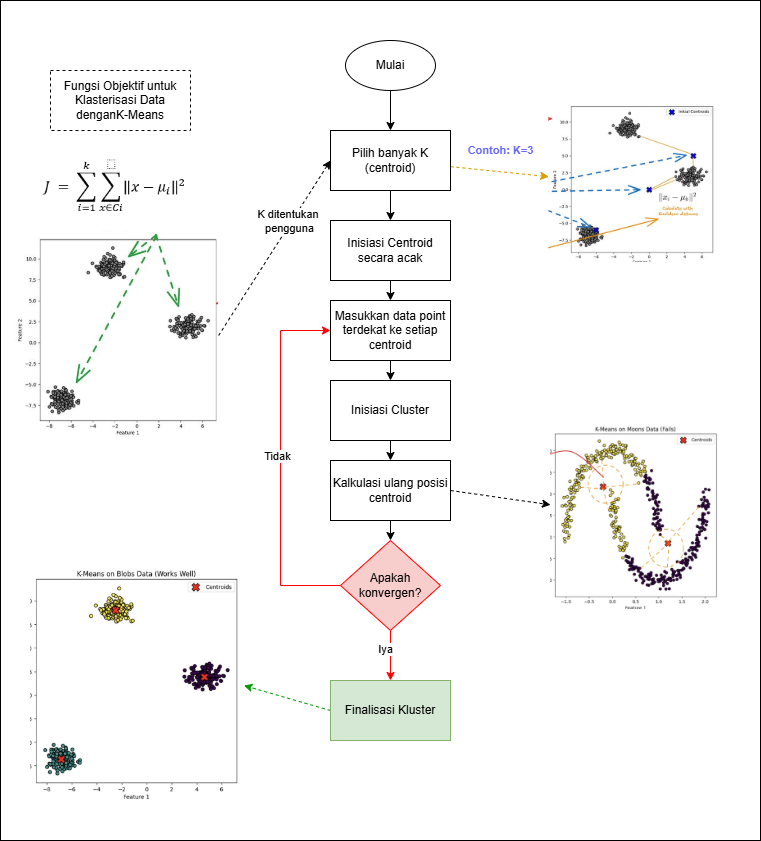

### Evaluasi: Silhouette Score, Dunn Index, Calinski-Harabasz

In [ ]:
def calculate_silhouette_score(X, labels):
    """Menghitung Silhouette Score"""
    n_samples = len(X)
    silhouette_scores = []

    for i in range(n_samples):
        # Cluster dari sample i
        cluster_i = labels[i]

        # Hitung a(i) - rata-rata jarak dalam cluster yang sama
        same_cluster_points = X[labels == cluster_i]
        if len(same_cluster_points) > 1:
            a_i = np.mean([euclidean_distance_simple(X[i], point)
                          for point in same_cluster_points if not np.array_equal(X[i], point)])
        else:
            a_i = 0

        # Hitung b(i) - rata-rata jarak minimum ke cluster lain
        b_i = float('inf')
        unique_clusters = np.unique(labels)

        for cluster_j in unique_clusters:
            if cluster_j != cluster_i:
                other_cluster_points = X[labels == cluster_j]
                if len(other_cluster_points) > 0:
                    avg_dist = np.mean([euclidean_distance_simple(X[i], point)
                                      for point in other_cluster_points])
                    b_i = min(b_i, avg_dist)

        # Hitung silhouette score untuk sample i
        if max(a_i, b_i) > 0:
            s_i = (b_i - a_i) / max(a_i, b_i)
        else:
            s_i = 0

        silhouette_scores.append(s_i)

    return np.mean(silhouette_scores)

def euclidean_distance_simple(point1, point2):
    """Helper function untuk menghitung euclidean distance"""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def calculate_davies_bouldin_index(X, labels, centroids):
    """Menghitung Davies-Bouldin Index"""
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Hitung rata-rata jarak dalam cluster (scatter)
    cluster_scatters = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            scatter = np.mean([euclidean_distance_simple(point, centroids[i])
                             for point in cluster_points])
        else:
            scatter = 0
        cluster_scatters.append(scatter)

    # Hitung Davies-Bouldin Index
    db_values = []
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                # Jarak antar centroid
                centroid_distance = euclidean_distance_simple(centroids[i], centroids[j])
                if centroid_distance > 0:
                    ratio = (cluster_scatters[i] + cluster_scatters[j]) / centroid_distance
                    max_ratio = max(max_ratio, ratio)
        db_values.append(max_ratio)

    return np.mean(db_values)

def calculate_calinski_harabasz_index(X, labels):
    """Menghitung Calinski-Harabasz Index"""
    n_samples, n_features = X.shape
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters == 1:
        return 0

    # Centroid keseluruhan
    overall_centroid = np.mean(X, axis=0)

    # Between-cluster sum of squares
    bgss = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_size = len(cluster_points)
        cluster_centroid = np.mean(cluster_points, axis=0)
        bgss += cluster_size * euclidean_distance_simple(cluster_centroid, overall_centroid) ** 2

    # Within-cluster sum of squares
    wgss = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_centroid = np.mean(cluster_points, axis=0)
        for point in cluster_points:
            wgss += euclidean_distance_simple(point, cluster_centroid) ** 2

    # Calinski-Harabasz Index
    if wgss > 0:
        ch_index = (bgss / (n_clusters - 1)) / (wgss / (n_samples - n_clusters))
    else:
        ch_index = 0

    return ch_index



## Implementasi Clustering

### Menggunakan Standarisasi

Bentuk data: (2000, 3)
5 data pertama:
[[  1.   126.   129.  ]
 [  1.    83.    54.99]
 [  1.   313.    59.9 ]
 [  1.   238.    84.9 ]
 [  1.   365.    59.9 ]]

=== STANDARDISASI DATA ===
Data berhasil di-standardisasi!
Mean setelah standardisasi: [9.76996262e-17 9.59232693e-17 6.12843110e-17]
Std setelah standardisasi: [1. 1. 1.]
Menjalankan K-Means untuk berbagai nilai K...
K	WCSS		Silhouette	DB Index	CH Index
-----------------------------------------------------------------
2	4088.2097		0.7341		0.4663		934.3349
3	2708.5454		0.4620		0.7403		1213.3884
4	1799.8956		0.4934		0.6902		1552.5731
5	1298.8769		0.5031		0.6252		1805.1635
6	1237.4842		0.4937		0.8303		1534.8005
7	955.8862		0.4180		0.8311		1752.8095
8	860.3766		0.3479		0.9137		1699.9417
9	730.6691		0.3745		0.8692		1794.7998
10	660.0800		0.3862		0.8265		1788.7462


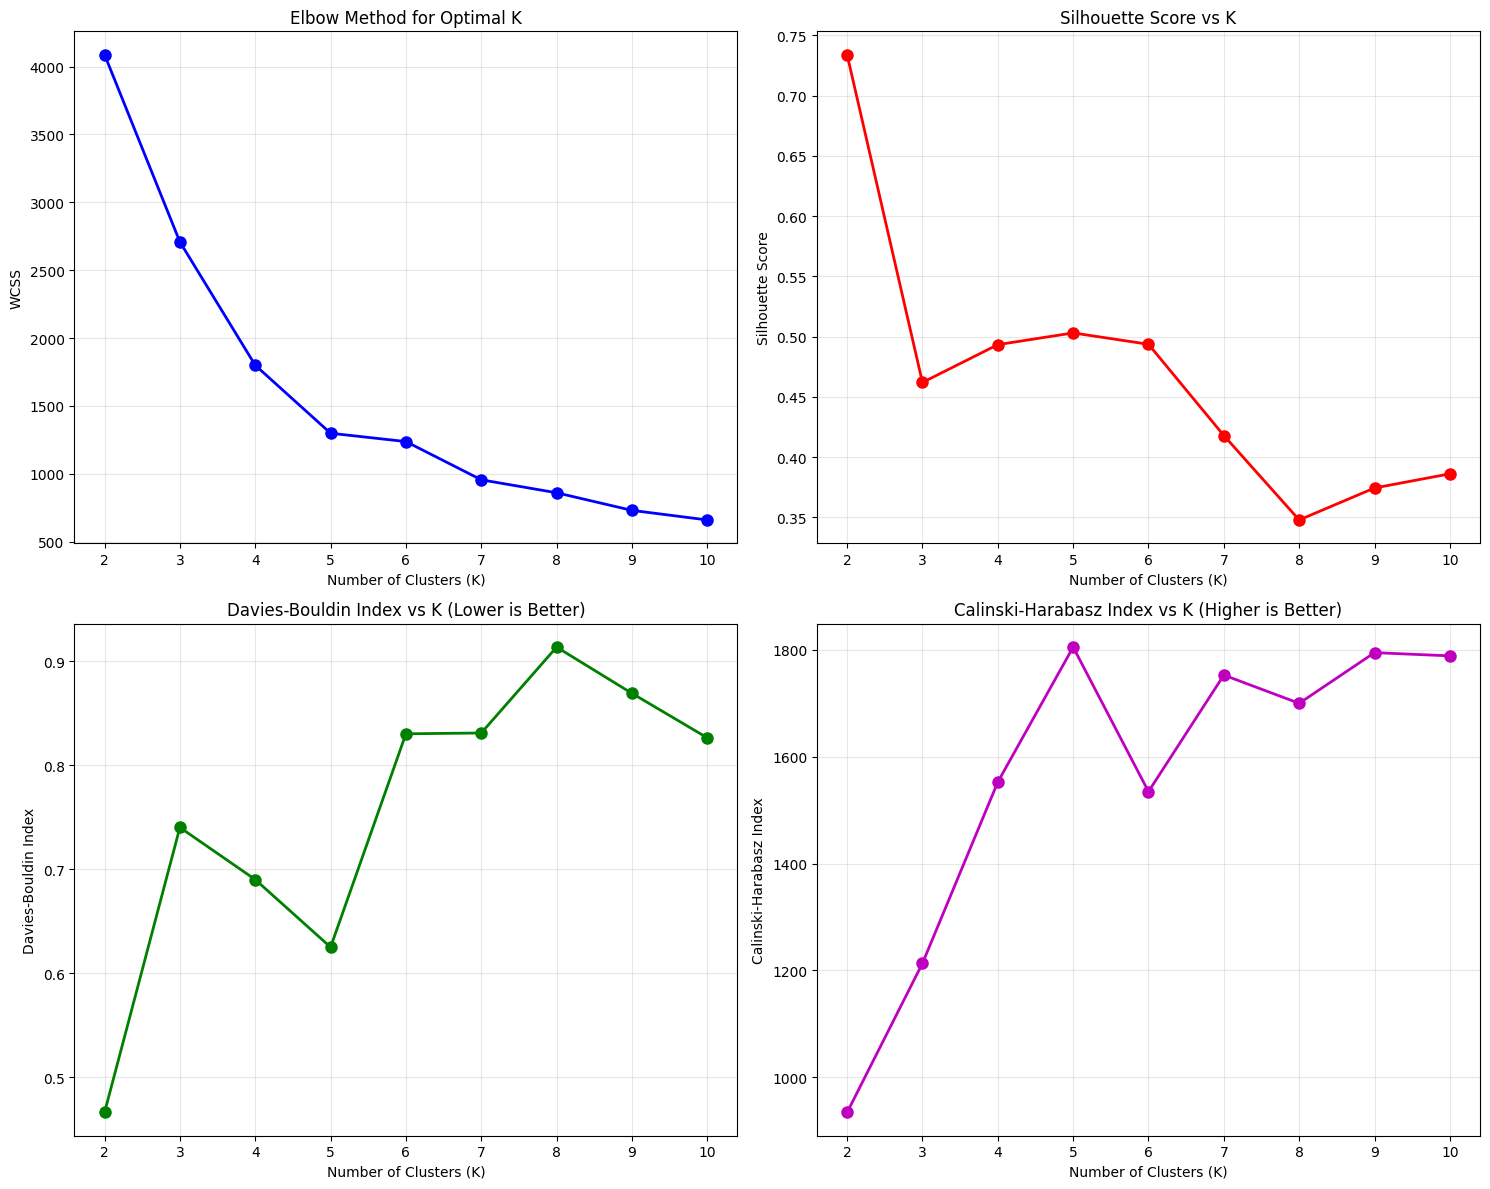

In [ ]:
# Prepare data
X = rfm_sample[['frequency', 'recency', 'monetary']].values

print("Bentuk data:", X.shape)
print("5 data pertama:")
print(X[:5])

# Standardisasi data menggunakan StandardScaler dari sklearn
print("\n=== STANDARDISASI DATA ===")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data berhasil di-standardisasi!")
print(f"Mean setelah standardisasi: {np.mean(X_scaled, axis=0)}")
print(f"Std setelah standardisasi: {np.std(X_scaled, axis=0)}")

# Elbow Method untuk menentukan K optimal
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []
db_indices = []
ch_indices = []

print("Menjalankan K-Means untuk berbagai nilai K...")
print("K\tWCSS\t\tSilhouette\tDB Index\tCH Index")
print("-" * 65)

for k in k_range:
    # Fit K-Means
    kmeans = KMeansScratch(k=k, random_state=42)
    kmeans.fit(X_scaled)

    # Hitung WCSS
    wcss_values.append(kmeans.wcss)

    # Hitung Silhouette Score
    sil_score = calculate_silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

    # Hitung Davies-Bouldin Index
    db_index = calculate_davies_bouldin_index(X_scaled, kmeans.labels_, kmeans.centroids)
    db_indices.append(db_index)

    # Hitung Calinski-Harabasz Index
    ch_index = calculate_calinski_harabasz_index(X_scaled, kmeans.labels_)
    ch_indices.append(ch_index)

    print(f"{k}\t{kmeans.wcss:.4f}\t\t{sil_score:.4f}\t\t{db_index:.4f}\t\t{ch_index:.4f}")

# Visualisasi hasil evaluasi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow Method Plot
axes[0, 0].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('Elbow Method for Optimal K')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs K')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin Index Plot
axes[1, 0].plot(k_range, db_indices, 'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin Index vs K (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz Index Plot
axes[1, 1].plot(k_range, ch_indices, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].set_title('Calinski-Harabasz Index vs K (Higher is Better)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



####Menentukan K Optimal

In [ ]:
# Menentukan K optimal berdasarkan berbagai metrik
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(db_indices)]
best_k_ch = k_range[np.argmax(ch_indices)]

print(f"\nK optimal berdasarkan:")
print(f"- Silhouette Score: K = {best_k_silhouette} (Score: {max(silhouette_scores):.4f})")
print(f"- Davies-Bouldin Index: K = {best_k_db} (Index: {min(db_indices):.4f})")
print(f"- Calinski-Harabasz Index: K = {best_k_ch} (Index: {max(ch_indices):.4f})")

# Pilih K optimal (misalnya berdasarkan Silhouette Score)
optimal_k = best_k_silhouette


K optimal berdasarkan:
- Silhouette Score: K = 2 (Score: 0.7341)
- Davies-Bouldin Index: K = 2 (Index: 0.4663)
- Calinski-Harabasz Index: K = 5 (Index: 1805.1635)


#### Memulai Clustering

In [ ]:
# Fit model dengan K optimal
print(f"\nMenjalankan K-Means final dengan K = {optimal_k}")
final_kmeans = KMeansScratch(k=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# Hasil clustering
print(f"\nHasil Clustering dengan K = {optimal_k}:")
print(f"WCSS: {final_kmeans.wcss:.4f}")
print(f"Silhouette Score: {calculate_silhouette_score(X_scaled, final_kmeans.labels_):.4f}")




Menjalankan K-Means final dengan K = 2

Hasil Clustering dengan K = 2:
WCSS: 4088.2097
Silhouette Score: 0.7341


#### Evaluasi

##### Distribusi Cluster


Distribusi data per cluster:
Cluster 0: 1931 data points (96.5%)
Cluster 1: 69 data points (3.5%)


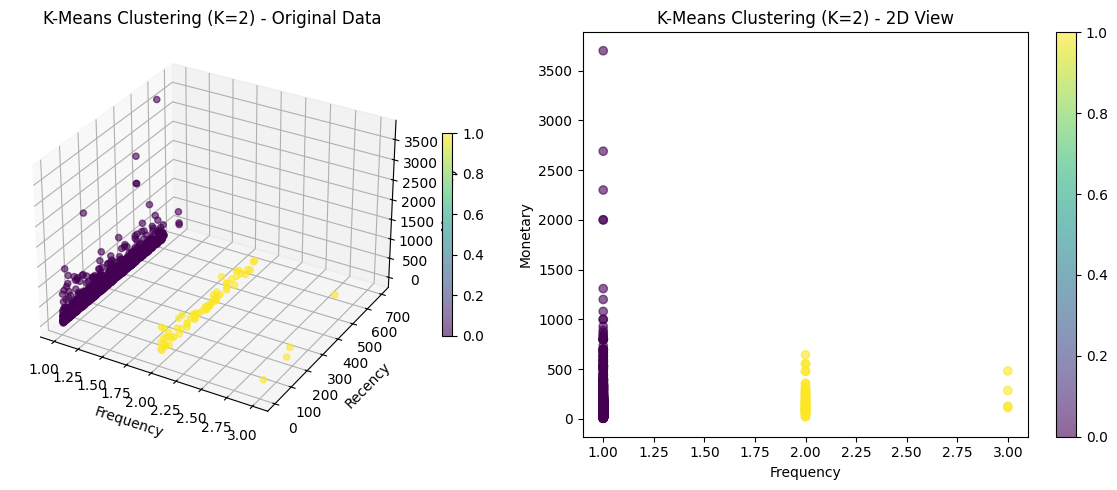

In [ ]:
# Distribusi cluster
unique, counts = np.unique(final_kmeans.labels_, return_counts=True)
print(f"\nDistribusi data per cluster:")
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} data points ({count/len(X)*100:.1f}%)")

# Visualisasi hasil clustering (3D plot)
fig = plt.figure(figsize=(12, 5))

# Plot 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Recency')
ax1.set_zlabel('Monetary')
ax1.set_title(f'K-Means Clustering (K={optimal_k}) - Original Data')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# Plot 2D (Frequency vs Monetary)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:, 0], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.set_title(f'K-Means Clustering (K={optimal_k}) - 2D View')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

##### Setiap Fitur dengan Cluster

In [ ]:
# Karakteristik setiap cluster
print(f"\nKarakteristik Setiap Cluster (Data Asli):")
print("-" * 50)
for i in range(optimal_k):
    cluster_data = X[final_kmeans.labels_ == i]
    print(f"\nCluster {i} ({len(cluster_data)} data points):")
    print(f"  Frequency - Mean: {np.mean(cluster_data[:, 0]):.2f}, Std: {np.std(cluster_data[:, 0]):.2f}")
    print(f"  Recency   - Mean: {np.mean(cluster_data[:, 1]):.2f}, Std: {np.std(cluster_data[:, 1]):.2f}")
    print(f"  Monetary  - Mean: {np.mean(cluster_data[:, 2]):.2f}, Std: {np.std(cluster_data[:, 2]):.2f}")

print("\n" + "="*70)
print("KESIMPULAN:")
print("="*70)
print(f"K-Means clustering berhasil dijalankan dengan K optimal = {optimal_k}")
print(f"Algoritma menggunakan Euclidean distance untuk menghitung jarak")
print(f"Evaluasi menggunakan multiple metrics:")
print(f"- Elbow Method (WCSS)")
print(f"- Silhouette Score: {calculate_silhouette_score(X_scaled, final_kmeans.labels_):.4f}")
print(f"- Davies-Bouldin Index: {calculate_davies_bouldin_index(X_scaled, final_kmeans.labels_, final_kmeans.centroids):.4f}")
print(f"- Calinski-Harabasz Index: {calculate_calinski_harabasz_index(X_scaled, final_kmeans.labels_):.4f}")
print("="*70)


Karakteristik Setiap Cluster (Data Asli):
--------------------------------------------------

Cluster 0 (1931 data points):
  Frequency - Mean: 1.00, Std: 0.00
  Recency   - Mean: 246.62, Std: 153.61
  Monetary  - Mean: 128.86, Std: 183.00

Cluster 1 (69 data points):
  Frequency - Mean: 2.06, Std: 0.23
  Recency   - Mean: 251.06, Std: 166.27
  Monetary  - Mean: 191.64, Std: 133.25

KESIMPULAN:
K-Means clustering berhasil dijalankan dengan K optimal = 2
Algoritma menggunakan Euclidean distance untuk menghitung jarak
Evaluasi menggunakan multiple metrics:
- Elbow Method (WCSS)
- Silhouette Score: 0.7341
- Davies-Bouldin Index: 0.4663
- Calinski-Harabasz Index: 934.3349


In [ ]:
rfm_sample
rfm_sample['scaled_cluster'] = final_kmeans.labels_

rfm_sample["scaled_cluster"].value_counts()

,count
scaled_cluster,
0,1931
1,69


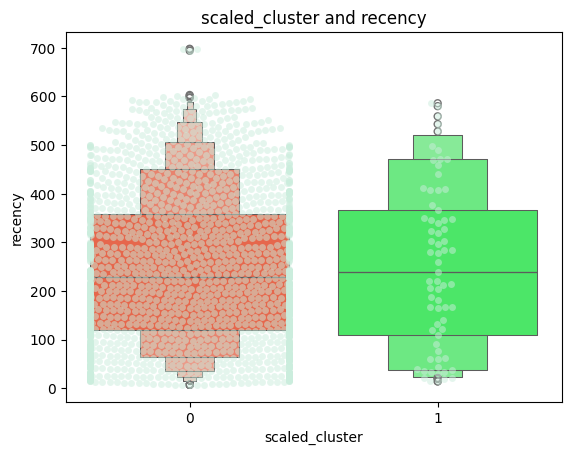

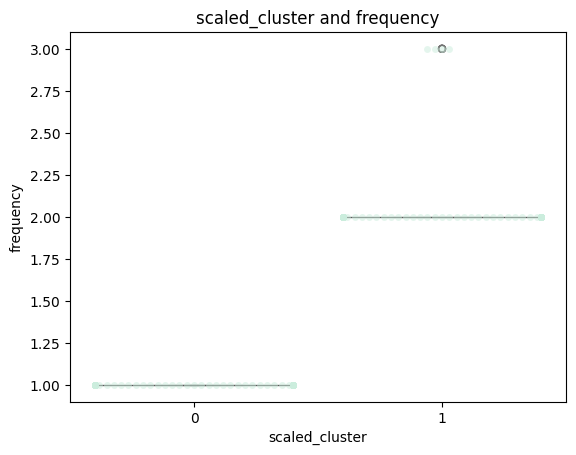

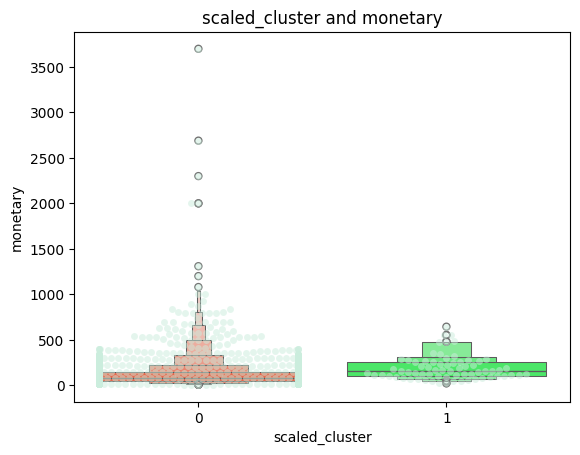

In [ ]:
column = ['recency','frequency','monetary']

for i,k in enumerate(column):
  plt.figure()
  pl=sns.swarmplot(x=rfm_sample["scaled_cluster"], y=rfm_sample[k], color= "#CBEDDD", alpha=0.5 )
  pl=sns.boxenplot(x=rfm_sample["scaled_cluster"], y=rfm_sample[k], palette=pal)
  pl.set_title(f"scaled_cluster and {k}")
  plt.show()



### Menggunakan Transformasi

Bentuk data: (2000, 3)
5 data pertama:
[[  1.   126.   129.  ]
 [  1.    83.    54.99]
 [  1.   313.    59.9 ]
 [  1.   238.    84.9 ]
 [  1.   365.    59.9 ]]

=== LOG TRANSFORMATION ===
Data berhasil di-transformasi!
Menjalankan K-Means untuk berbagai nilai K...
K	WCSS		Silhouette	DB Index	CH Index
-----------------------------------------------------------------
2	2107.0205		0.3142		1.2564		944.5164
3	1272.5558		0.3756		0.8710		1436.3006
4	1045.7113		0.3223		0.9629		1308.9963
5	853.7972		0.3368		0.8988		1313.9267
6	747.4956		0.3283		0.9452		1256.7362
7	620.1512		0.3357		0.9142		1329.9083
8	542.7576		0.3365		0.8577		1342.3911
9	506.4016		0.3263		0.8939		1276.1550
10	461.8055		0.3172		0.9117		1264.6317


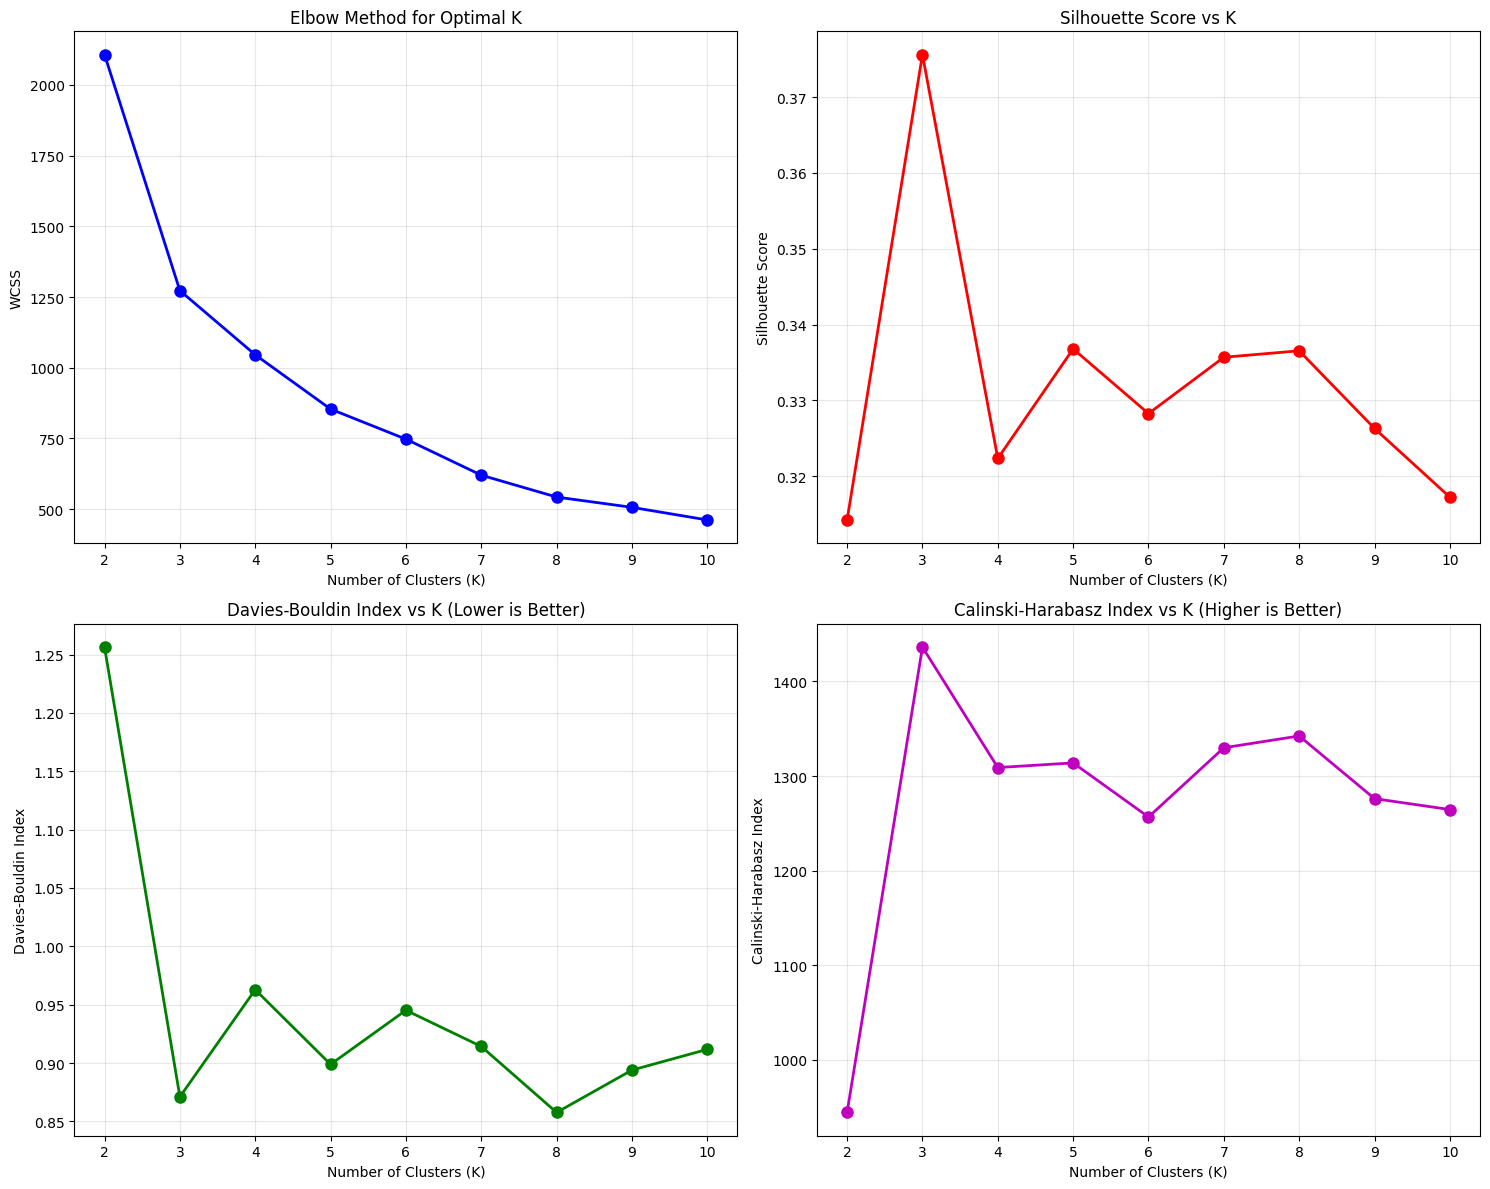

In [ ]:
# Prepare data
X = rfm_sample[['frequency', 'recency', 'monetary']].values

print("Bentuk data:", X.shape)
print("5 data pertama:")
print(X[:5])

# Log transformation menggunakan FunctionTransformer dari sklearn
print("\n=== LOG TRANSFORMATION ===")
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p = log(1+x)
X_log = log_transformer.fit_transform(X)




print(f"Data berhasil di-transformasi!")


# Elbow Method untuk menentukan K optimal
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []
db_indices = []
ch_indices = []

print("Menjalankan K-Means untuk berbagai nilai K...")
print("K\tWCSS\t\tSilhouette\tDB Index\tCH Index")
print("-" * 65)

for k in k_range:
    # Fit K-Means
    kmeans = KMeansScratch(k=k, random_state=42)
    kmeans.fit(X_log)

    # Hitung WCSS
    wcss_values.append(kmeans.wcss)

    # Hitung Silhouette Score
    sil_score = calculate_silhouette_score(X_log, kmeans.labels_)
    silhouette_scores.append(sil_score)

    # Hitung Davies-Bouldin Index
    db_index = calculate_davies_bouldin_index(X_log, kmeans.labels_, kmeans.centroids)
    db_indices.append(db_index)

    # Hitung Calinski-Harabasz Index
    ch_index = calculate_calinski_harabasz_index(X_log, kmeans.labels_)
    ch_indices.append(ch_index)

    print(f"{k}\t{kmeans.wcss:.4f}\t\t{sil_score:.4f}\t\t{db_index:.4f}\t\t{ch_index:.4f}")

# Visualisasi hasil evaluasi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow Method Plot
axes[0, 0].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('Elbow Method for Optimal K')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs K')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin Index Plot
axes[1, 0].plot(k_range, db_indices, 'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin Index vs K (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz Index Plot
axes[1, 1].plot(k_range, ch_indices, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].set_title('Calinski-Harabasz Index vs K (Higher is Better)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



####Menentukan K Optimal

In [ ]:
# Menentukan K optimal berdasarkan berbagai metrik
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(db_indices)]
best_k_ch = k_range[np.argmax(ch_indices)]

print(f"\nK optimal berdasarkan:")
print(f"- Silhouette Score: K = {best_k_silhouette} (Score: {max(silhouette_scores):.4f})")
print(f"- Davies-Bouldin Index: K = {best_k_db} (Index: {min(db_indices):.4f})")
print(f"- Calinski-Harabasz Index: K = {best_k_ch} (Index: {max(ch_indices):.4f})")

# Pilih K optimal (misalnya berdasarkan Silhouette Score)
optimal_k = best_k_silhouette


K optimal berdasarkan:
- Silhouette Score: K = 3 (Score: 0.3756)
- Davies-Bouldin Index: K = 8 (Index: 0.8577)
- Calinski-Harabasz Index: K = 3 (Index: 1436.3006)


#### Memulai Clustering

In [ ]:
# Fit model dengan K optimal
print(f"\nMenjalankan K-Means final dengan K = {optimal_k}")
final_kmeans = KMeansScratch(k=optimal_k, random_state=42)
final_kmeans.fit(X_log)

# Hasil clustering
print(f"\nHasil Clustering dengan K = {optimal_k}:")
print(f"WCSS: {final_kmeans.wcss:.4f}")
print(f"Silhouette Score: {calculate_silhouette_score(X_log, final_kmeans.labels_):.4f}")




Menjalankan K-Means final dengan K = 3

Hasil Clustering dengan K = 3:
WCSS: 1272.5558
Silhouette Score: 0.3756


#### Evaluasi

##### Distribusi Cluster


Distribusi data per cluster:
Cluster 0: 823 data points (41.1%)
Cluster 1: 749 data points (37.5%)
Cluster 2: 428 data points (21.4%)


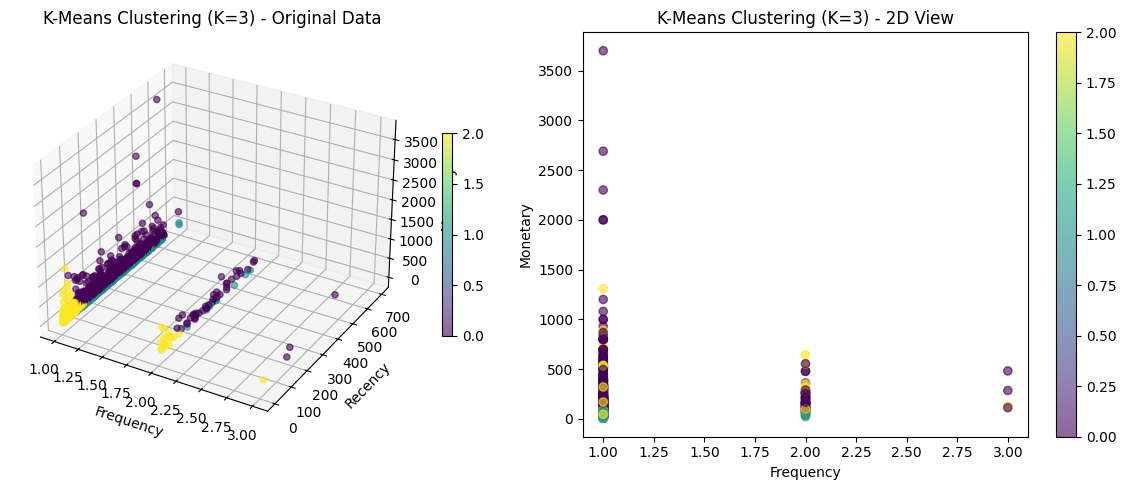

In [ ]:
# Distribusi cluster
unique, counts = np.unique(final_kmeans.labels_, return_counts=True)
print(f"\nDistribusi data per cluster:")
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} data points ({count/len(X)*100:.1f}%)")

# Visualisasi hasil clustering (3D plot)
fig = plt.figure(figsize=(12, 5))

# Plot 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Recency')
ax1.set_zlabel('Monetary')
ax1.set_title(f'K-Means Clustering (K={optimal_k}) - Original Data')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# Plot 2D (Frequency vs Monetary)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:, 0], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.set_title(f'K-Means Clustering (K={optimal_k}) - 2D View')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

##### Setiap Fitur dengan Cluster

In [ ]:
# Karakteristik setiap cluster
print(f"\nKarakteristik Setiap Cluster (Data Asli):")
print("-" * 50)
for i in range(optimal_k):
    cluster_data = X[final_kmeans.labels_ == i]
    print(f"\nCluster {i} ({len(cluster_data)} data points):")
    print(f"  Frequency - Mean: {np.mean(cluster_data[:, 0]):.2f}, Std: {np.std(cluster_data[:, 0]):.2f}")
    print(f"  Recency   - Mean: {np.mean(cluster_data[:, 1]):.2f}, Std: {np.std(cluster_data[:, 1]):.2f}")
    print(f"  Monetary  - Mean: {np.mean(cluster_data[:, 2]):.2f}, Std: {np.std(cluster_data[:, 2]):.2f}")

print("\n" + "="*70)
print("KESIMPULAN:")
print("="*70)
print(f"K-Means clustering berhasil dijalankan dengan K optimal = {optimal_k}")
print(f"Algoritma menggunakan Euclidean distance untuk menghitung jarak")
print(f"Evaluasi menggunakan multiple metrics:")
print(f"- Elbow Method (WCSS)")
print(f"- Silhouette Score: {calculate_silhouette_score(X_log, final_kmeans.labels_):.4f}")
print(f"- Davies-Bouldin Index: {calculate_davies_bouldin_index(X_log, final_kmeans.labels_, final_kmeans.centroids):.4f}")
print(f"- Calinski-Harabasz Index: {calculate_calinski_harabasz_index(X_log, final_kmeans.labels_):.4f}")
print("="*70)


Karakteristik Setiap Cluster (Data Asli):
--------------------------------------------------

Cluster 0 (823 data points):
  Frequency - Mean: 1.05, Std: 0.24
  Recency   - Mean: 299.13, Std: 134.82
  Monetary  - Mean: 218.56, Std: 238.87

Cluster 1 (749 data points):
  Frequency - Mean: 1.01, Std: 0.11
  Recency   - Mean: 297.58, Std: 129.29
  Monetary  - Mean: 44.99, Std: 19.88

Cluster 2 (428 data points):
  Frequency - Mean: 1.04, Std: 0.22
  Recency   - Mean: 57.18, Std: 31.41
  Monetary  - Mean: 113.25, Std: 127.07

KESIMPULAN:
K-Means clustering berhasil dijalankan dengan K optimal = 3
Algoritma menggunakan Euclidean distance untuk menghitung jarak
Evaluasi menggunakan multiple metrics:
- Elbow Method (WCSS)
- Silhouette Score: 0.3756
- Davies-Bouldin Index: 0.8710
- Calinski-Harabasz Index: 1436.3006


In [ ]:
rfm_sample
rfm_sample['log_cluster'] = final_kmeans.labels_

rfm_sample["log_cluster"].value_counts()

,count
log_cluster,
0,823
1,749
2,428


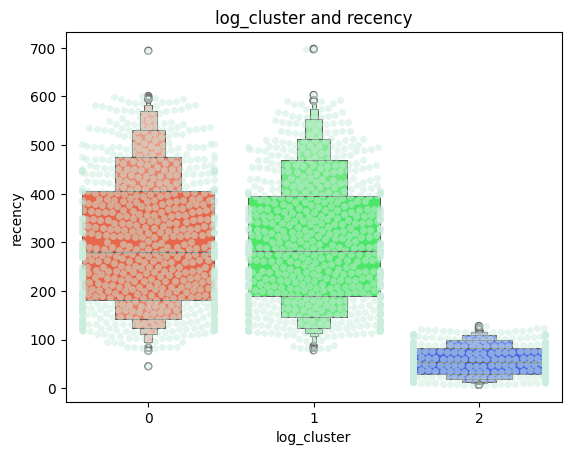

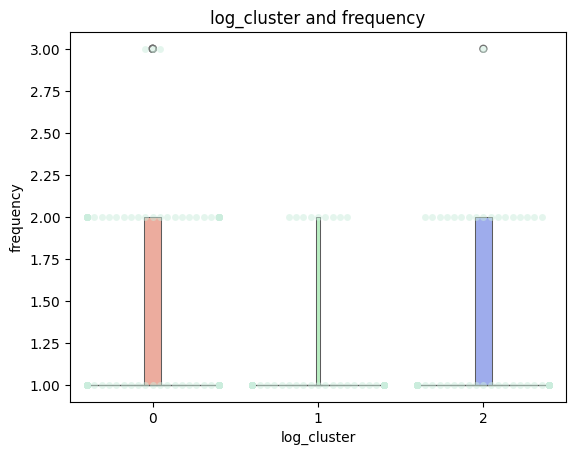

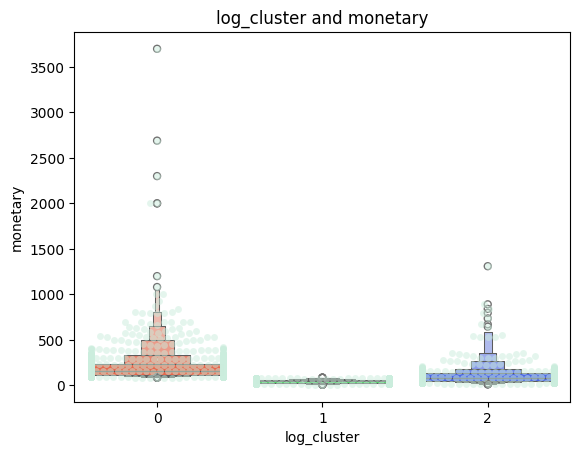

In [ ]:
column = ['recency','frequency','monetary']

for i,k in enumerate(column):
  plt.figure()
  pl=sns.swarmplot(x=rfm_sample["log_cluster"], y=rfm_sample[k], color= "#CBEDDD", alpha=0.5 )
  pl=sns.boxenplot(x=rfm_sample["log_cluster"], y=rfm_sample[k], palette=pal)
  pl.set_title(f"log_cluster and {k}")
  plt.show()



### Menggunakan Normalisasi

Bentuk data: (2000, 3)
5 data pertama:
[[  1.   126.   129.  ]
 [  1.    83.    54.99]
 [  1.   313.    59.9 ]
 [  1.   238.    84.9 ]
 [  1.   365.    59.9 ]]

=== NORMALIZED TRANSFORMATION (Min-Max Scaling) ===
Data berhasil di-normalisasi!
Menjalankan K-Means untuk berbagai nilai K...
K	WCSS		Silhouette	DB Index	CH Index
-----------------------------------------------------------------
2	52.5686		0.5420		0.6652		2709.5608
3	37.1338		0.4857		0.7122		2331.9659
4	31.9184		0.4264		0.8229		1916.4819
5	29.0517		0.4035		0.8964		1627.6140
6	14.3213		0.4741		0.6370		3050.2594
7	13.0275		0.4466		0.6807		2825.8935
8	12.2425		0.4568		0.6944		2594.4606
9	10.4897		0.4628		0.6223		2689.7678
10	7.5483		0.4673		0.6378		3407.0836


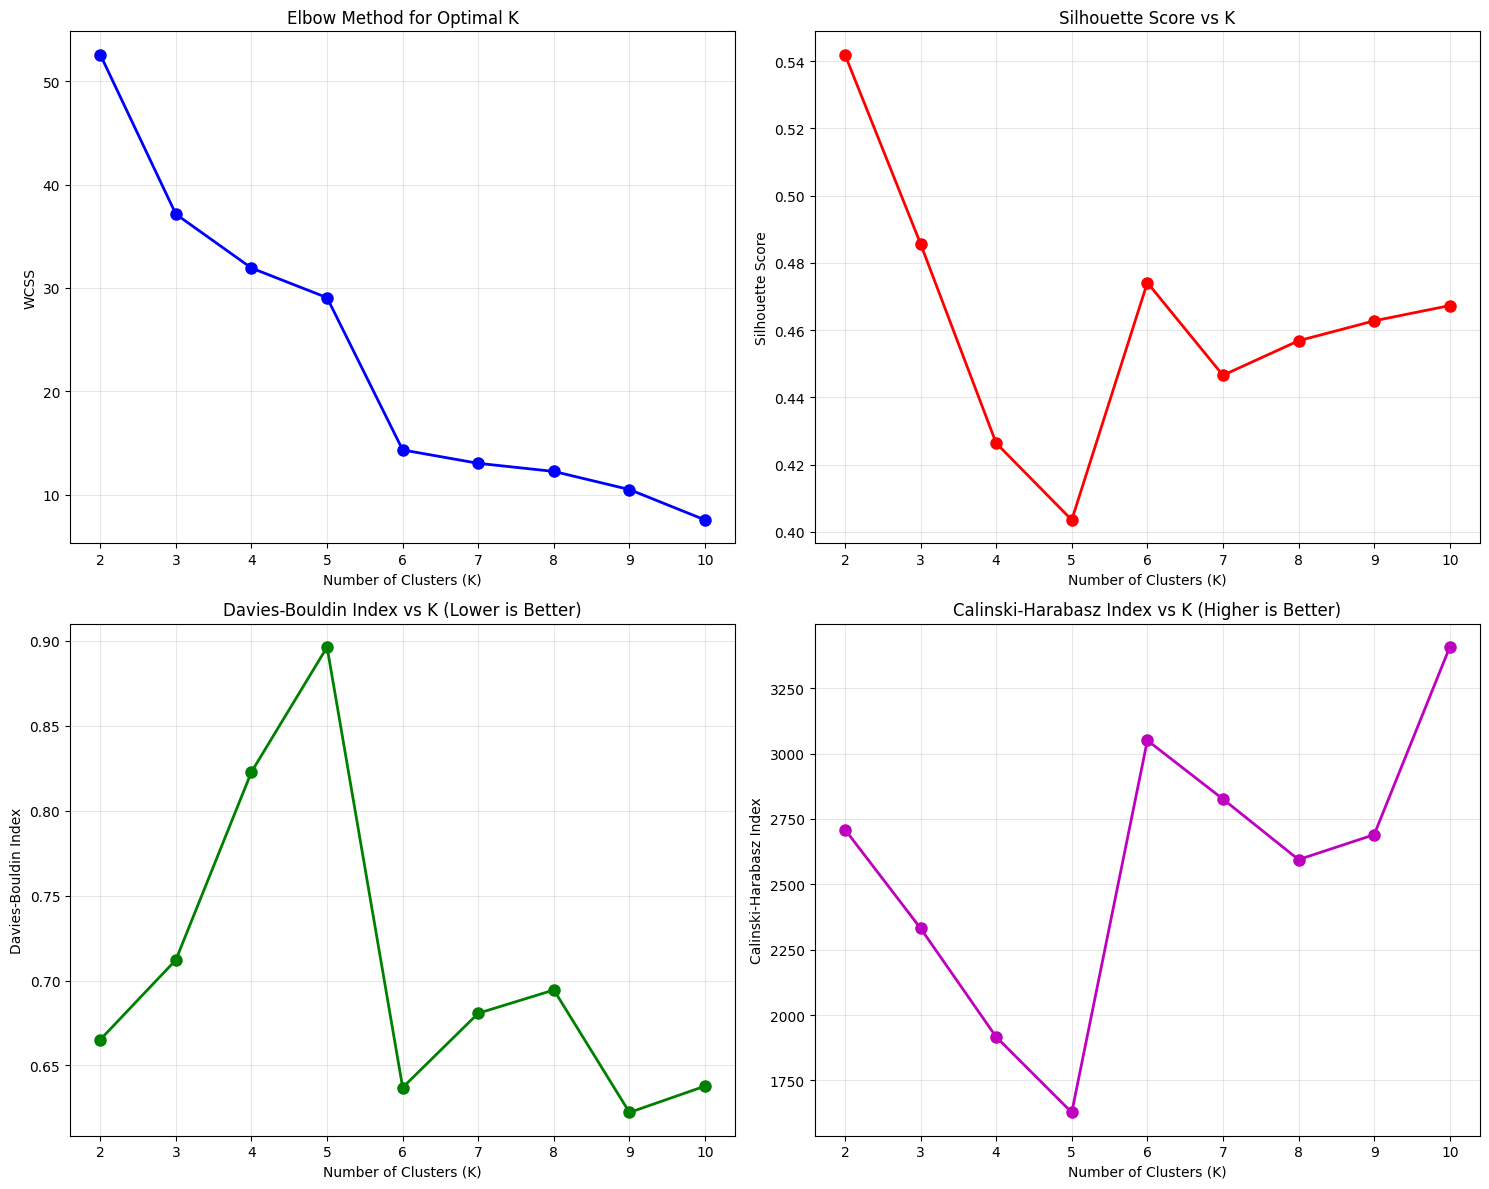

In [ ]:
# Prepare data
X = rfm_sample[['frequency', 'recency', 'monetary']].values

print("Bentuk data:", X.shape)
print("5 data pertama:")
print(X[:5])

# Normalized transformation menggunakan MinMaxScaler
print("\n=== NORMALIZED TRANSFORMATION (Min-Max Scaling) ===")
normalized_transformer = MinMaxScaler()
X_normalized = normalized_transformer.fit_transform(X)




print(f"Data berhasil di-normalisasi!")


# Elbow Method untuk menentukan K optimal
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []
db_indices = []
ch_indices = []

print("Menjalankan K-Means untuk berbagai nilai K...")
print("K\tWCSS\t\tSilhouette\tDB Index\tCH Index")
print("-" * 65)

for k in k_range:
    # Fit K-Means
    kmeans = KMeansScratch(k=k, random_state=42)
    kmeans.fit(X_normalized)

    # Hitung WCSS
    wcss_values.append(kmeans.wcss)

    # Hitung Silhouette Score
    sil_score = calculate_silhouette_score(X_normalized, kmeans.labels_)
    silhouette_scores.append(sil_score)

    # Hitung Davies-Bouldin Index
    db_index = calculate_davies_bouldin_index(X_normalized, kmeans.labels_, kmeans.centroids)
    db_indices.append(db_index)

    # Hitung Calinski-Harabasz Index
    ch_index = calculate_calinski_harabasz_index(X_normalized, kmeans.labels_)
    ch_indices.append(ch_index)

    print(f"{k}\t{kmeans.wcss:.4f}\t\t{sil_score:.4f}\t\t{db_index:.4f}\t\t{ch_index:.4f}")

# Visualisasi hasil evaluasi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow Method Plot
axes[0, 0].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('Elbow Method for Optimal K')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs K')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin Index Plot
axes[1, 0].plot(k_range, db_indices, 'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin Index vs K (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz Index Plot
axes[1, 1].plot(k_range, ch_indices, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].set_title('Calinski-Harabasz Index vs K (Higher is Better)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



####Menentukan K Optimal

In [ ]:
# Menentukan K optimal berdasarkan berbagai metrik
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(db_indices)]
best_k_ch = k_range[np.argmax(ch_indices)]

print(f"\nK optimal berdasarkan:")
print(f"- Silhouette Score: K = {best_k_silhouette} (Score: {max(silhouette_scores):.4f})")
print(f"- Davies-Bouldin Index: K = {best_k_db} (Index: {min(db_indices):.4f})")
print(f"- Calinski-Harabasz Index: K = {best_k_ch} (Index: {max(ch_indices):.4f})")

# Pilih K optimal (misalnya berdasarkan Silhouette Score)
optimal_k = best_k_silhouette


K optimal berdasarkan:
- Silhouette Score: K = 2 (Score: 0.5420)
- Davies-Bouldin Index: K = 9 (Index: 0.6223)
- Calinski-Harabasz Index: K = 10 (Index: 3407.0836)


#### Memulai Clustering

In [ ]:
# Fit model dengan K optimal
print(f"\nMenjalankan K-Means final dengan K = {optimal_k}")
final_kmeans = KMeansScratch(k=optimal_k, random_state=42)
final_kmeans.fit(X_normalized)

# Hasil clustering
print(f"\nHasil Clustering dengan K = {optimal_k}:")
print(f"WCSS: {final_kmeans.wcss:.4f}")
print(f"Silhouette Score: {calculate_silhouette_score(X_normalized, final_kmeans.labels_):.4f}")




Menjalankan K-Means final dengan K = 2

Hasil Clustering dengan K = 2:
WCSS: 52.5686
Silhouette Score: 0.5420


#### Evaluasi

##### Distribusi Cluster


Distribusi data per cluster:
Cluster 0: 1130 data points (56.5%)
Cluster 1: 870 data points (43.5%)


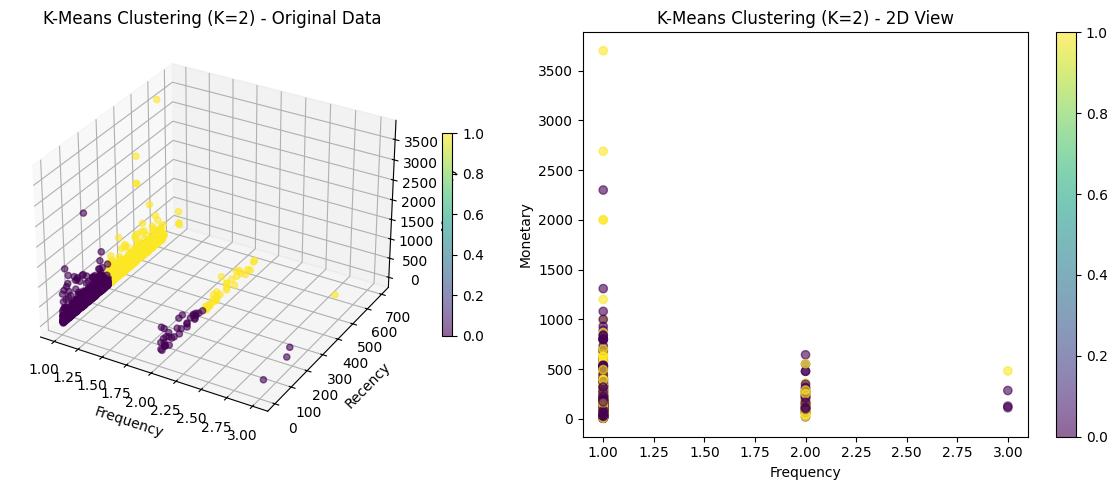

In [ ]:
# Distribusi cluster
unique, counts = np.unique(final_kmeans.labels_, return_counts=True)
print(f"\nDistribusi data per cluster:")
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} data points ({count/len(X)*100:.1f}%)")

# Visualisasi hasil clustering (3D plot)
fig = plt.figure(figsize=(12, 5))

# Plot 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Recency')
ax1.set_zlabel('Monetary')
ax1.set_title(f'K-Means Clustering (K={optimal_k}) - Original Data')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# Plot 2D (Frequency vs Monetary)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:, 0], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.set_title(f'K-Means Clustering (K={optimal_k}) - 2D View')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

##### Setiap Fitur dengan Cluster

In [ ]:
# Karakteristik setiap cluster
print(f"\nKarakteristik Setiap Cluster (Data Asli):")
print("-" * 50)
for i in range(optimal_k):
    cluster_data = X[final_kmeans.labels_ == i]
    print(f"\nCluster {i} ({len(cluster_data)} data points):")
    print(f"  Frequency - Mean: {np.mean(cluster_data[:, 0]):.2f}, Std: {np.std(cluster_data[:, 0]):.2f}")
    print(f"  Recency   - Mean: {np.mean(cluster_data[:, 1]):.2f}, Std: {np.std(cluster_data[:, 1]):.2f}")
    print(f"  Monetary  - Mean: {np.mean(cluster_data[:, 2]):.2f}, Std: {np.std(cluster_data[:, 2]):.2f}")

print("\n" + "="*70)
print("KESIMPULAN:")
print("="*70)
print(f"K-Means clustering berhasil dijalankan dengan K optimal = {optimal_k}")
print(f"Algoritma menggunakan Euclidean distance untuk menghitung jarak")
print(f"Evaluasi menggunakan multiple metrics:")
print(f"- Elbow Method (WCSS)")
print(f"- Silhouette Score: {calculate_silhouette_score(X_normalized, final_kmeans.labels_):.4f}")
print(f"- Davies-Bouldin Index: {calculate_davies_bouldin_index(X_normalized, final_kmeans.labels_, final_kmeans.centroids):.4f}")
print(f"- Calinski-Harabasz Index: {calculate_calinski_harabasz_index(X_normalized, final_kmeans.labels_):.4f}")
print("="*70)


Karakteristik Setiap Cluster (Data Asli):
--------------------------------------------------

Cluster 0 (1130 data points):
  Frequency - Mean: 1.03, Std: 0.20
  Recency   - Mean: 132.31, Std: 71.99
  Monetary  - Mean: 124.87, Std: 149.92

Cluster 1 (870 data points):
  Frequency - Mean: 1.04, Std: 0.20
  Recency   - Mean: 395.44, Std: 93.37
  Monetary  - Mean: 139.01, Std: 216.18

KESIMPULAN:
K-Means clustering berhasil dijalankan dengan K optimal = 2
Algoritma menggunakan Euclidean distance untuk menghitung jarak
Evaluasi menggunakan multiple metrics:
- Elbow Method (WCSS)
- Silhouette Score: 0.5420
- Davies-Bouldin Index: 0.6652
- Calinski-Harabasz Index: 2709.5608


In [ ]:
rfm_sample
rfm_sample['normalized_cluster'] = final_kmeans.labels_

rfm_sample["normalized_cluster"].value_counts()

,count
normalized_cluster,
0,1130
1,870


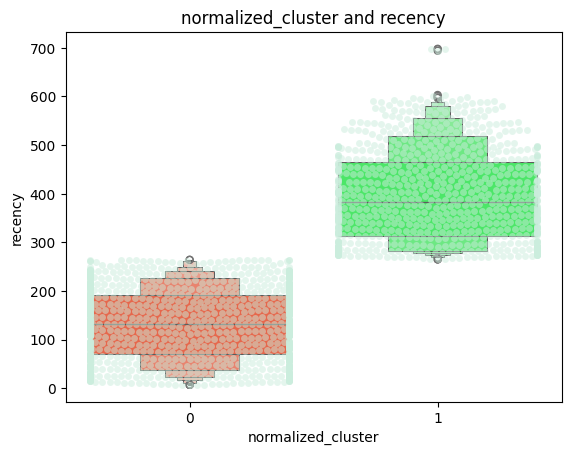

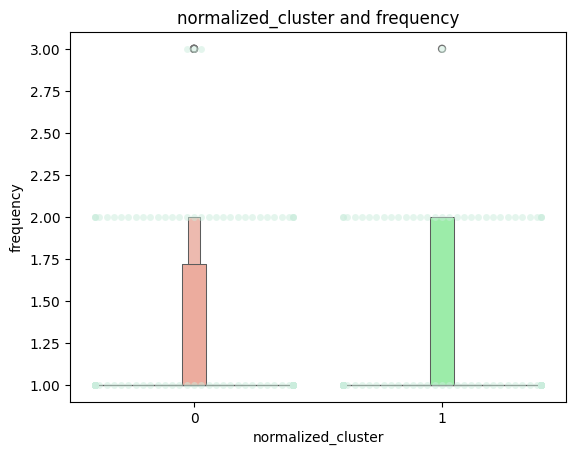

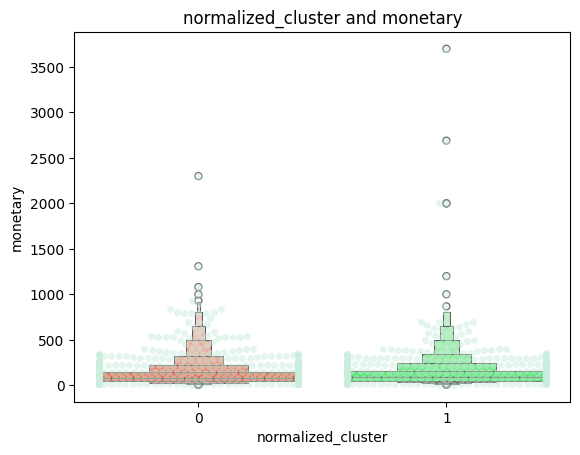

In [ ]:
column = ['recency','frequency','monetary']

for i,k in enumerate(column):
  plt.figure()
  pl=sns.swarmplot(x=rfm_sample["normalized_cluster"], y=rfm_sample[k], color= "#CBEDDD", alpha=0.5 )
  pl=sns.boxenplot(x=rfm_sample["normalized_cluster"], y=rfm_sample[k], palette=pal)
  pl.set_title(f"normalized_cluster and {k}")
  plt.show()



### Tanpa Menggunakan Feature Scaling (Raw)

Bentuk data: (2000, 3)
5 data pertama:
[[  1.   126.   129.  ]
 [  1.    83.    54.99]
 [  1.   313.    59.9 ]
 [  1.   238.    84.9 ]
 [  1.   365.    59.9 ]]
Data berhasil di-normalisasi!
Menjalankan K-Means untuk berbagai nilai K...
K	WCSS		Silhouette	DB Index	CH Index
-----------------------------------------------------------------
2	79419787.6170		0.4283		0.9901		860.6257
3	48710032.1096		0.4657		0.7615		1330.7719
4	41603743.8294		0.3794		0.8762		1151.8444
5	24681135.4934		0.3944		0.7346		1797.4425
6	19760914.6338		0.4177		0.7419		1894.3826
7	17532754.8914		0.3551		0.8201		1820.5973
8	15217444.5801		0.3703		0.7482		1840.3364
9	14129320.1027		0.3395		0.8123		1752.6017
10	12871068.4666		0.3670		0.8183		1730.9189


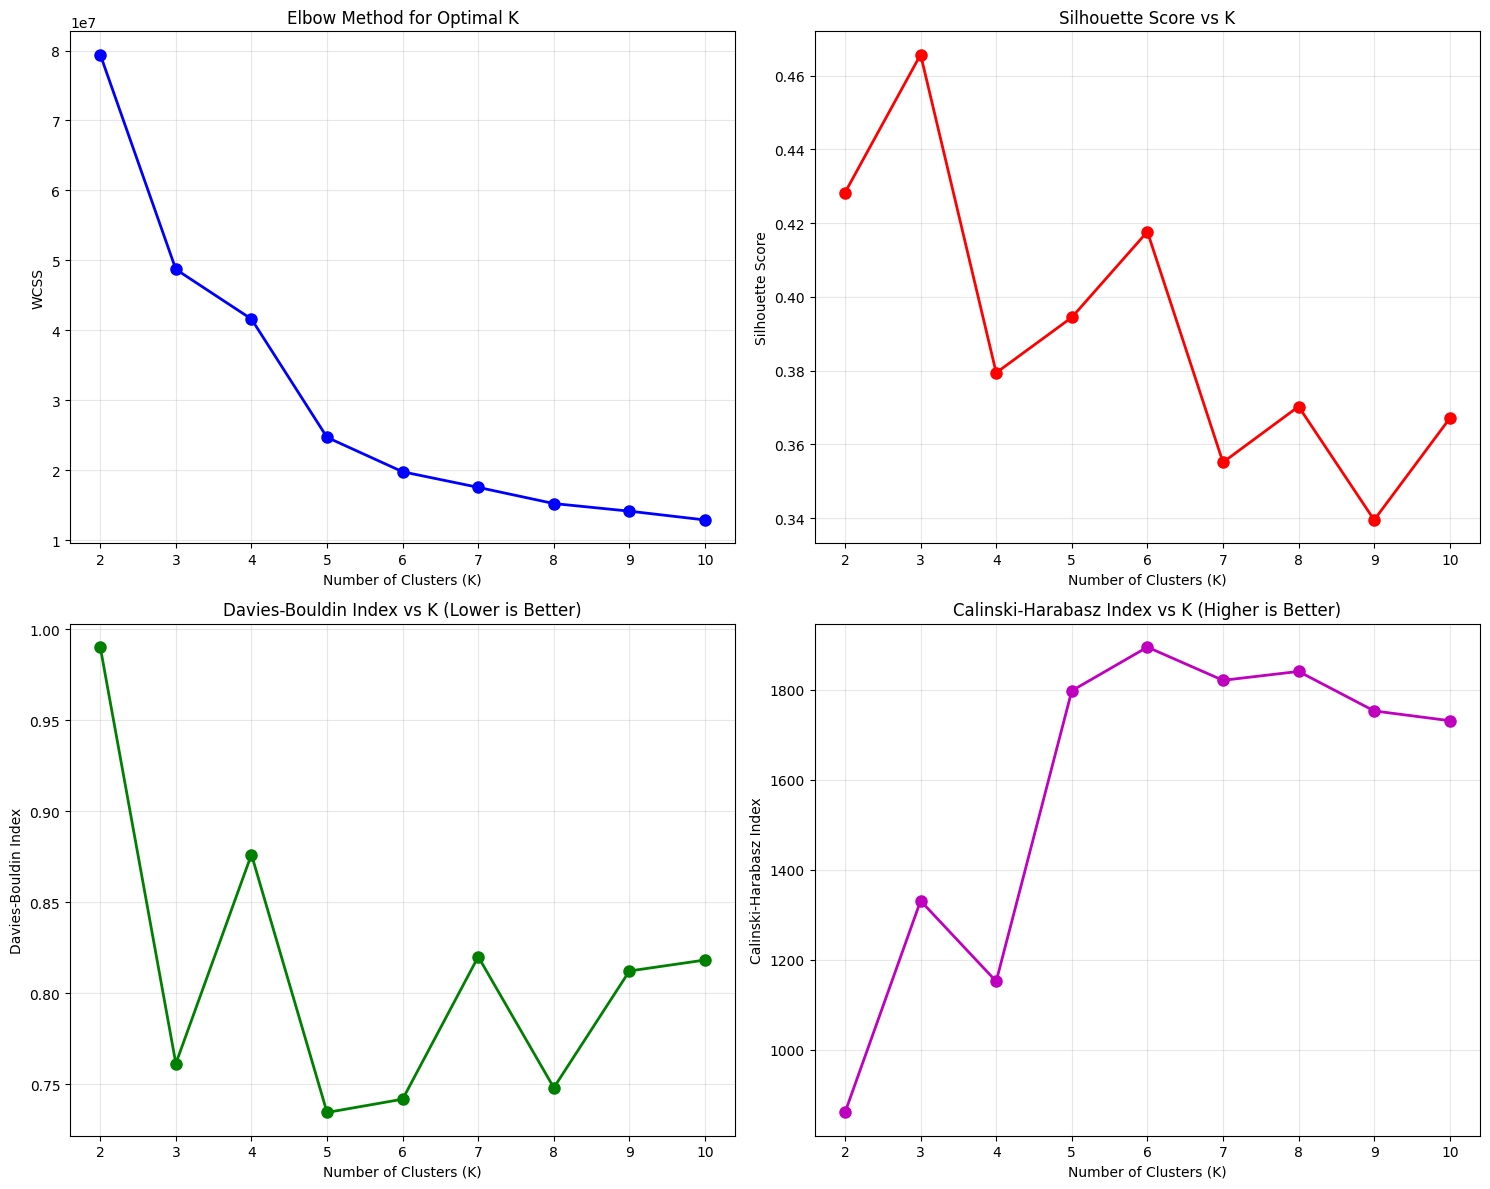

In [ ]:
# Prepare data
X = rfm_sample[['frequency', 'recency', 'monetary']].values

print("Bentuk data:", X.shape)
print("5 data pertama:")
print(X[:5])
X_raw = X




print(f"Data berhasil di-normalisasi!")


# Elbow Method untuk menentukan K optimal
k_range = range(2, 11)
wcss_values = []
silhouette_scores = []
db_indices = []
ch_indices = []

print("Menjalankan K-Means untuk berbagai nilai K...")
print("K\tWCSS\t\tSilhouette\tDB Index\tCH Index")
print("-" * 65)

for k in k_range:
    # Fit K-Means
    kmeans = KMeansScratch(k=k, random_state=42)
    kmeans.fit(X_raw)

    # Hitung WCSS
    wcss_values.append(kmeans.wcss)

    # Hitung Silhouette Score
    sil_score = calculate_silhouette_score(X_raw, kmeans.labels_)
    silhouette_scores.append(sil_score)

    # Hitung Davies-Bouldin Index
    db_index = calculate_davies_bouldin_index(X_raw, kmeans.labels_, kmeans.centroids)
    db_indices.append(db_index)

    # Hitung Calinski-Harabasz Index
    ch_index = calculate_calinski_harabasz_index(X_raw, kmeans.labels_)
    ch_indices.append(ch_index)

    print(f"{k}\t{kmeans.wcss:.4f}\t\t{sil_score:.4f}\t\t{db_index:.4f}\t\t{ch_index:.4f}")

# Visualisasi hasil evaluasi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Elbow Method Plot
axes[0, 0].plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('WCSS')
axes[0, 0].set_title('Elbow Method for Optimal K')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[0, 1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs K')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin Index Plot
axes[1, 0].plot(k_range, db_indices, 'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin Index vs K (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz Index Plot
axes[1, 1].plot(k_range, ch_indices, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].set_title('Calinski-Harabasz Index vs K (Higher is Better)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



####Menentukan K Optimal

In [ ]:
# Menentukan K optimal berdasarkan berbagai metrik
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(db_indices)]
best_k_ch = k_range[np.argmax(ch_indices)]

print(f"\nK optimal berdasarkan:")
print(f"- Silhouette Score: K = {best_k_silhouette} (Score: {max(silhouette_scores):.4f})")
print(f"- Davies-Bouldin Index: K = {best_k_db} (Index: {min(db_indices):.4f})")
print(f"- Calinski-Harabasz Index: K = {best_k_ch} (Index: {max(ch_indices):.4f})")

# Pilih K optimal (misalnya berdasarkan Silhouette Score)
optimal_k = best_k_silhouette


K optimal berdasarkan:
- Silhouette Score: K = 3 (Score: 0.4657)
- Davies-Bouldin Index: K = 5 (Index: 0.7346)
- Calinski-Harabasz Index: K = 6 (Index: 1894.3826)


#### Memulai Clustering

In [ ]:
# Fit model dengan K optimal
print(f"\nMenjalankan K-Means final dengan K = {optimal_k}")
final_kmeans = KMeansScratch(k=optimal_k, random_state=42)
final_kmeans.fit(X_raw)

# Hasil clustering
print(f"\nHasil Clustering dengan K = {optimal_k}:")
print(f"WCSS: {final_kmeans.wcss:.4f}")
print(f"Silhouette Score: {calculate_silhouette_score(X_raw, final_kmeans.labels_):.4f}")




Menjalankan K-Means final dengan K = 3

Hasil Clustering dengan K = 3:
WCSS: 48710032.1096
Silhouette Score: 0.4657


#### Evaluasi

##### Distribusi Cluster


Distribusi data per cluster:
Cluster 0: 66 data points (3.3%)
Cluster 1: 846 data points (42.3%)
Cluster 2: 1088 data points (54.4%)


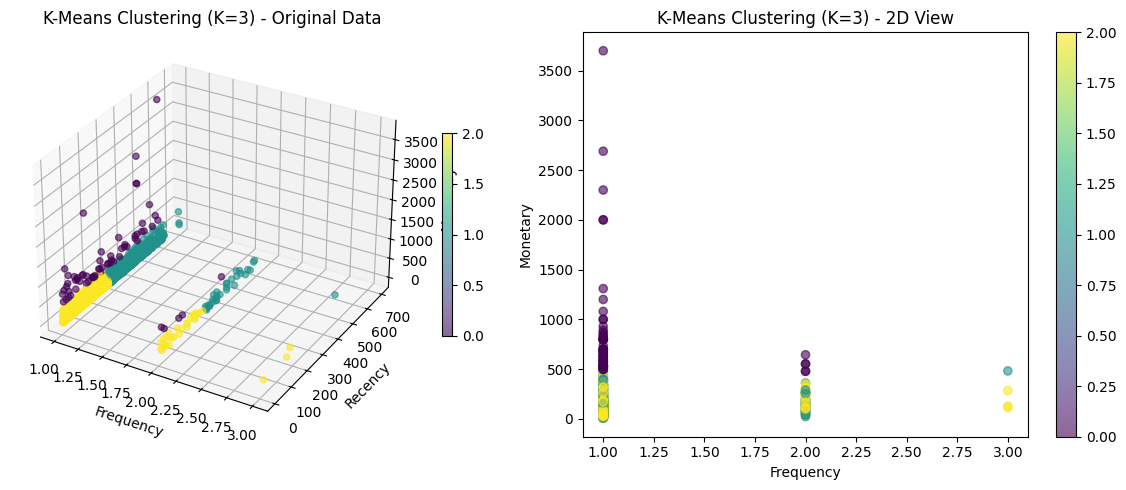

In [ ]:
# Distribusi cluster
unique, counts = np.unique(final_kmeans.labels_, return_counts=True)
print(f"\nDistribusi data per cluster:")
for i, count in enumerate(counts):
    print(f"Cluster {i}: {count} data points ({count/len(X)*100:.1f}%)")

# Visualisasi hasil clustering (3D plot)
fig = plt.figure(figsize=(12, 5))

# Plot 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Recency')
ax1.set_zlabel('Monetary')
ax1.set_title(f'K-Means Clustering (K={optimal_k}) - Original Data')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# Plot 2D (Frequency vs Monetary)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:, 0], X[:, 2], c=final_kmeans.labels_, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.set_title(f'K-Means Clustering (K={optimal_k}) - 2D View')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

##### Setiap Fitur dengan Cluster

In [ ]:
# Karakteristik setiap cluster
print(f"\nKarakteristik Setiap Cluster (Data Asli):")
print("-" * 50)
for i in range(optimal_k):
    cluster_data = X[final_kmeans.labels_ == i]
    print(f"\nCluster {i} ({len(cluster_data)} data points):")
    print(f"  Frequency - Mean: {np.mean(cluster_data[:, 0]):.2f}, Std: {np.std(cluster_data[:, 0]):.2f}")
    print(f"  Recency   - Mean: {np.mean(cluster_data[:, 1]):.2f}, Std: {np.std(cluster_data[:, 1]):.2f}")
    print(f"  Monetary  - Mean: {np.mean(cluster_data[:, 2]):.2f}, Std: {np.std(cluster_data[:, 2]):.2f}")

print("\n" + "="*70)
print("KESIMPULAN:")
print("="*70)
print(f"K-Means clustering berhasil dijalankan dengan K optimal = {optimal_k}")
print(f"Algoritma menggunakan Euclidean distance untuk menghitung jarak")
print(f"Evaluasi menggunakan multiple metrics:")
print(f"- Elbow Method (WCSS)")
print(f"- Silhouette Score: {calculate_silhouette_score(X_raw, final_kmeans.labels_):.4f}")
print(f"- Davies-Bouldin Index: {calculate_davies_bouldin_index(X_raw, final_kmeans.labels_, final_kmeans.centroids):.4f}")
print(f"- Calinski-Harabasz Index: {calculate_calinski_harabasz_index(X_raw, final_kmeans.labels_):.4f}")
print("="*70)


Karakteristik Setiap Cluster (Data Asli):
--------------------------------------------------

Cluster 0 (66 data points):
  Frequency - Mean: 1.08, Std: 0.26
  Recency   - Mean: 237.50, Std: 166.07
  Monetary  - Mean: 817.99, Std: 549.87

Cluster 1 (846 data points):
  Frequency - Mean: 1.04, Std: 0.20
  Recency   - Mean: 394.44, Std: 93.63
  Monetary  - Mean: 113.50, Std: 90.50

Cluster 2 (1088 data points):
  Frequency - Mean: 1.03, Std: 0.19
  Recency   - Mean: 132.51, Std: 71.63
  Monetary  - Mean: 102.98, Std: 80.25

KESIMPULAN:
K-Means clustering berhasil dijalankan dengan K optimal = 3
Algoritma menggunakan Euclidean distance untuk menghitung jarak
Evaluasi menggunakan multiple metrics:
- Elbow Method (WCSS)
- Silhouette Score: 0.4657
- Davies-Bouldin Index: 0.7615
- Calinski-Harabasz Index: 1330.7719


In [ ]:
rfm_sample
rfm_sample['raw_cluster'] = final_kmeans.labels_

rfm_sample["raw_cluster"].value_counts()

,count
raw_cluster,
2,1088
1,846
0,66


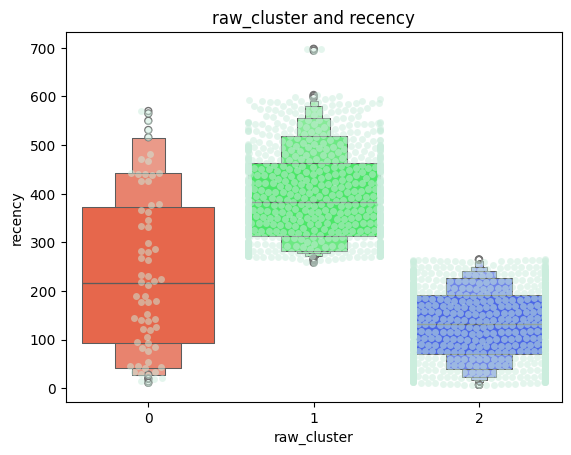

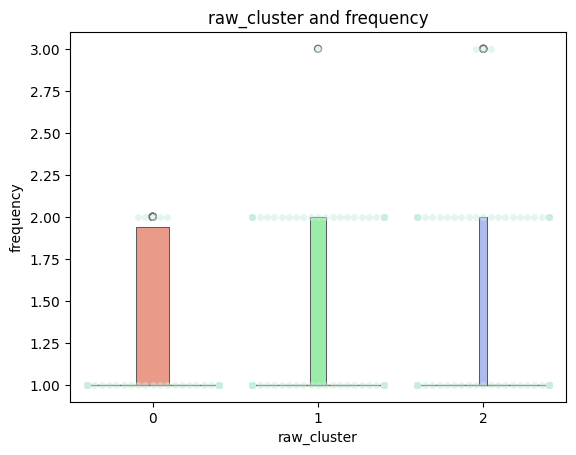

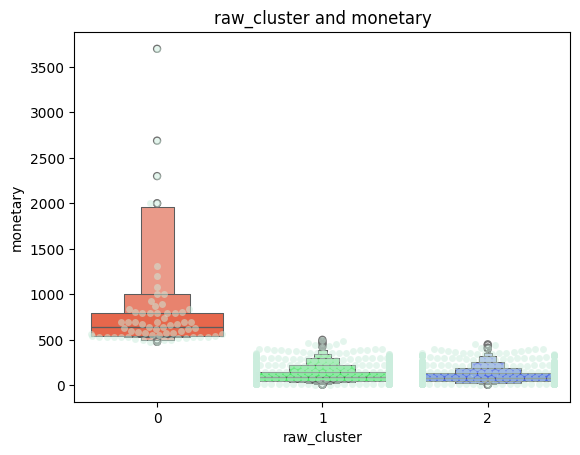

In [ ]:
column = ['recency','frequency','monetary']

for i,k in enumerate(column):
  plt.figure()
  pl=sns.swarmplot(x=rfm_sample["raw_cluster"], y=rfm_sample[k], color= "#CBEDDD", alpha=0.5 )
  pl=sns.boxenplot(x=rfm_sample["raw_cluster"], y=rfm_sample[k], palette=pal)
  pl.set_title(f"raw_cluster and {k}")
  plt.show()



Segmentasi pelanggan berbasis analisis RFM, menggunakan dataset transaksi yang mencakup 94.488 entri. Melalui tahapan eksplorasi data, pembersihan, dan evaluasi model secara menyeluruh, empat pendekatan feature scaling yaitu standardisasi, normalisasi min-max, transformasi logaritmik, dan penggunaan data mentah—diuji untuk menentukan metode paling efektif dalam membentuk segmentasi pelanggan yang relevan secara bisnis.
Hasil analisis menunjukkan bahwa pendekatan standardisasi memberikan performa terbaik, tercermin dari nilai Silhouette Score tertinggi sebesar 0.7341 dan Calinski-Harabasz Index sebesar 934.33. Temuan ini mengindikasikan bahwa standardisasi mampu menjaga proporsi antar fitur dengan baik, sehingga mendukung pembentukan cluster yang lebih optimal pada algoritma berbasis jarak seperti K-Means.

Segmentasi yang dihasilkan dari pendekatan terbaik ini membentuk dua kelompok pelanggan yang cukup kontras. Kelompok pertama mencakup pelanggan dengan nilai transaksi tinggi tetapi frekuensi pembelian rendah (High Value, Low Engagement), sementara kelompok kedua terdiri dari pelanggan yang sering bertransaksi namun dengan nilai yang lebih kecil (Engaged but Low Value). Meskipun hanya menghasilkan dua segmen, pembagian ini tetap memberikan insight yang kuat dan dapat ditindaklanjuti untuk mendukung keputusan bisnis.
Hasil segmentasi ini sangat potensial untuk digunakan dalam berbagai strategi, seperti mempertahankan pelanggan bernilai tinggi, merancang program upselling dan cross-selling yang lebih terarah, serta mengoptimalkan alokasi sumber daya pemasaran. Validasi terhadap hasil clustering juga telah dilakukan secara menyeluruh menggunakan berbagai metrik—Silhouette Score, Dunn Index, Calinski-Harabasz Index, dan WCSS—yang bersama-sama mengonfirmasi kualitas pemisahan dan kekompakan antar cluster.
